In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
%pprint off
#plt.style.use('seaborn')

Pretty printing has been turned ON


In [3]:
sns.set_style("ticks")

## Preparing the dataframes

In [4]:
df_all = pd.read_csv('data/dataport-export_gas_oct2015-mar2016.csv')
len(df_all)

1584823

In [5]:
df_all = df_all.set_index(pd.to_datetime(df_all['localminute']))

In [6]:
df_all = df_all.drop(columns='localminute')
display(df_all.head())

dataid  meter_value
localminute                             
2015-10-01 05:00:10     739        88858
2015-10-01 05:00:13    8890       197164
2015-10-01 05:00:20    6910       179118
2015-10-01 05:00:22    3635       151318
2015-10-01 05:00:22    1507       390354

In [7]:
groups = df_all.groupby('dataid')
keys = groups.groups.keys()  # keys: an iterable of dataids or meter ids

# check if each group (grouped by meter id) is sorted in ascending order by datetime.
# for key in keys:
#     df_i = groups.get_group(key)
#     print(df_i.index.is_monotonic_increasing)
# each group is already sorted in ascending order by datetime.

### Check meterids

In [8]:
keys_list = list(keys)
print(keys_list)

[35, 44, 77, 94, 114, 187, 222, 252, 370, 483, 484, 661, 739, 744, 871, 1042, 1086, 1103, 1185, 1283, 1403, 1415, 1507, 1556, 1589, 1619, 1697, 1714, 1718, 1790, 1791, 1792, 1800, 1801, 2018, 2034, 2072, 2094, 2129, 2233, 2335, 2378, 2449, 2461, 2470, 2575, 2638, 2645, 2755, 2814, 2818, 2945, 2946, 2965, 2980, 3036, 3039, 3134, 3310, 3367, 3527, 3544, 3577, 3635, 3723, 3778, 3849, 3893, 3918, 4029, 4031, 4193, 4228, 4296, 4352, 4356, 4373, 4421, 4447, 4514, 4671, 4732, 4767, 4874, 4998, 5129, 5131, 5193, 5275, 5317, 5395, 5403, 5439, 5484, 5545, 5636, 5658, 5785, 5810, 5814, 5892, 5972, 6101, 6412, 6505, 6578, 6673, 6685, 6830, 6836, 6863, 6910, 7016, 7017, 7030, 7117, 7287, 7429, 7460, 7566, 7674, 7682, 7739, 7741, 7794, 7900, 7919, 7965, 7989, 8059, 8084, 8086, 8155, 8156, 8244, 8386, 8467, 8703, 8829, 8890, 8967, 9052, 9121, 9134, 9160, 9278, 9295, 9474, 9600, 9620, 9631, 9639, 9729, 9766, 9849, 9956, 9982]


### Print full-length (6 mth) plot by meterid.

In [9]:
# for key in keys_list:    
#     df_i = groups.get_group(key)
#     df_i.drop(columns='dataid').plot(figsize=(15,4), title=str(f'meter {key}'))

In [10]:
key = 3134
df_i = groups.get_group(key).drop(columns='dataid')

### Select data by datetime period. e.g. 1 month. i.e. Zoom in.

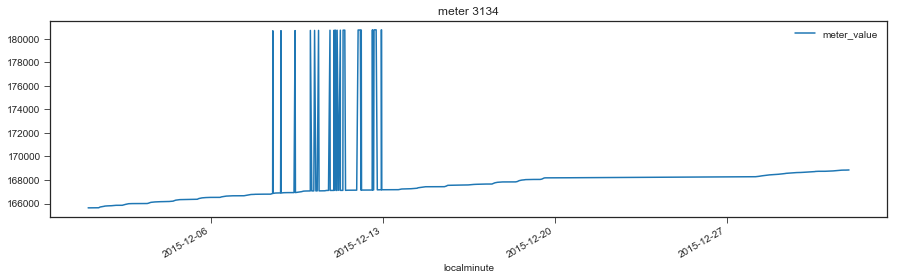

In [11]:
def zoom(df, start_date, end_date):
    # pre-condition: df is indexed by datetime.
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    mask = (df.index >= start_date) & (df.index <= end_date)

    new_df = df.iloc[mask]
    return new_df
    
df_i_bymonth = zoom(df_i, '2015-12-01', '2016-01-01')
df_i_bymonth.plot(figsize=(15,4), title=str(f'meter {key}'))

### Resample with hourly frequency.

744

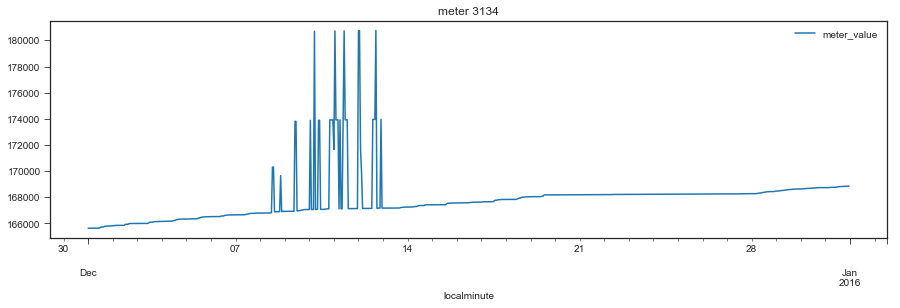

In [12]:
df_i_bymonth_resampled = df_i_bymonth.resample('H').mean().ffill()
df_i_bymonth_resampled.plot(figsize=(15,4), title=str(f'meter {key}'))
display(len(df_i_bymonth_resampled))

### Iterate and plot december's hourly-resampled data for each suspicious meter (spiking values).

In [29]:
suspicious_meters_list = [1185, 1556, 2335, 2449, 3134, 3544, 4447, 4514, \
                          5129, 5403,6836, 7030, 7117, 8156, 9134, 9639, 9982]

# for meter in suspicious_meters_list:
#     df_i = groups.get_group(meter)
#     df_i_bymonth = zoom(df_i, '2015-12-01', '2016-01-01').drop(columns='dataid')
#     df_i_bymonth_resampled = df_i_bymonth.resample('H').mean().ffill()
#     df_i_bymonth_resampled.plot(figsize=(15,4), title=str(f'meter {meter}, {len(df_i_bymonth_resampled)} samples'))


We clearly see that there is some obvious malfunctioning happening within 7-14 Dec 2015.

### Zoom in deeper within the time period (e.g. one day/24h)

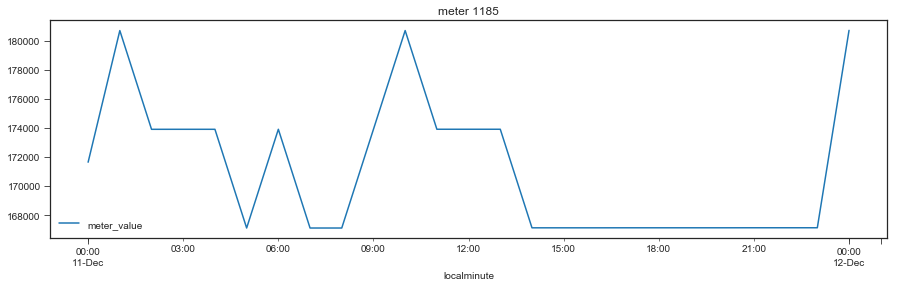

In [30]:
df_i_byday = zoom(df_i_bymonth_resampled, '2015-12-11', '2015-12-12')
df_i_byday.plot(figsize=(15,4), title=str(f'meter {key}'))

In [31]:
# for i in range(7):
#     start_date = f'2015-12-{8+i}'
#     end_date = f'2015-12-{9+i}'
#     df_i_byday = zoom(df_i_bymonth_resampled, start_date, end_date)
#     df_i_byday.plot(figsize=(15,4), title=str(f'meter {key}'))

In [32]:
less500_list = [4874, 6101, 9620, 7566, 5545, 2814, 2946, 2755,\
                9160, 2645, 6685, 1403, 8703, 9600, 3036, 5658]

def get_month_counts(df_i):
    # get count of samples per month
    df_i_resample_monthly_count = df_i.resample('M').count().rename(columns={'meter_value': 'count'})  
    return df_i_resample_monthly_count

for meter in less500_list:
    df_i = groups.get_group(meter)
    df_i_counts = get_month_counts(df_i)
    display(df_i_counts.head(6))


dataid  count
localminute               
2016-02-29        1      1
2016-03-31        1      1

dataid  count
localminute               
2016-01-31        3      3

dataid  count
localminute               
2015-10-31        1      1
2015-11-30        0      0
2015-12-31        0      0
2016-01-31        3      3
2016-02-29       13     13
2016-03-31        6      6

dataid  count
localminute               
2016-01-31       32     32

dataid  count
localminute               
2015-12-31        3      3
2016-01-31       16     16
2016-02-29       13     13
2016-03-31        1      1

dataid  count
localminute               
2016-01-31        6      6
2016-02-29       31     31

dataid  count
localminute               
2016-01-31       45     45

dataid  count
localminute               
2016-01-31       68     68

dataid  count
localminute               
2016-01-31       72     72

dataid  count
localminute               
2015-10-31       12     12
2015-11-30       10     10
2015-12-31        1      1
2016-01-31       19     19
2016-02-29       32     32

dataid  count
localminute               
2015-10-31        1      1
2015-11-30        0      0
2015-12-31       14     14
2016-01-31       21     21
2016-02-29       39     39
2016-03-31        3      3

dataid  count
localminute               
2016-01-31      202    202

dataid  count
localminute               
2015-10-31      134    134
2015-11-30        0      0
2015-12-31        3      3
2016-01-31      117    117
2016-02-29        3      3
2016-03-31        1      1

dataid  count
localminute               
2016-01-31      330    330

dataid  count
localminute               
2016-01-31      336    336

dataid  count
localminute               
2015-11-30       98     98
2015-12-31      176    176
2016-01-31      201    201
2016-02-29       16     16
2016-03-31        2      2

In [33]:
count_list = []
for key in keys_list:
    df_i = groups.get_group(key)
    count_list.append(len(df_i.index))
    
less2000_mask = np.asarray(count_list) < 2000
display(less2000_mask)

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True,  True, False,  True,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False,  True, False,  True, False, False,
       False, False, False,  True, False,  True,  True, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True,

In [34]:
less2000_list = []
for i in range(len(less2000_mask)):
    if less2000_mask[i] == True:
        less2000_list.append(keys_list[i])

display(less2000_list)

[44,
 187,
 1103,
 1403,
 1415,
 1792,
 2470,
 2645,
 2755,
 2814,
 2818,
 2946,
 3036,
 3849,
 4193,
 4228,
 4296,
 4356,
 4373,
 4671,
 4874,
 5317,
 5395,
 5545,
 5658,
 6101,
 6505,
 6578,
 6685,
 6863,
 7566,
 7965,
 8059,
 8244,
 8386,
 8703,
 9160,
 9600,
 9620,
 9956,
 9982]

In [35]:
# for meter in less2000_list:
#     df_i = groups.get_group(meter).drop(columns='dataid')
#     df_i_resample_monthly_count = df_i.resample('M').count()  # get count of samples per month
    
#     display(f'avg sample per month: {len(df_i)/len(df_i_resample_monthly_count)}',\
#             f'nmonths={len(df_i_resample_monthly_count)}')

### Resample data hourly, taking last value in the hour as new value.
For each meter:
- Visualise 6month usage
- Visualise 1month usage
- Visualise 1day usage

In [36]:
# # Resample by taking last cumulative reading for each hour.

# key = keys_list[4]
# df_i = groups.get_group(key).drop(columns='dataid')
# df_i.plot(figsize=(15,4), title=str(f'meter {key}'))

# # resample hourly using last reading for each hour, forward-filling any missing values
# df_i_resample_hourly = df_i.resample('H').last().ffill()
# df_i_resample_hourly.plot(figsize=(15,4), title=str(f'meter {key}'))

# display(f'total samples: {len(df_i)}')
# display(f'no. of hours: {len(df_i_resample_hourly)}')
# first_date = df_i.index.values[0] 
# last_date = df_i.index.values[-1]
# display(f'first date: {first_date}')
# display(f'last date: {last_date}')
# display(df_i_resample_hourly.tail())

# # zoom in to particular month
# df_i_month = zoom(df_i_resample_hourly, '2016-01-01', '2016-02-01')
# df_i_month.plot(figsize=(15,4), title=str(f'meter {key}'))

# # zoom in to particular day
# df_i_day = zoom(df_i_month, '2016-01-02', '2016-01-03')
# df_i_day.plot(figsize=(15,4), title=str(f'meter {key}'))

# # find hour on hour change, i.e. marginal hourly usage
# # this is useful to notice hourly consumption patterns
# df_i_day.diff().plot(figsize=(15,4), title=str(f'meter {key}'))

In [37]:
def remove_mal_data(df):
    # this method finds the start datetime and end datetime of the malfunctioning period and returns a new df without data
    # from that period. NOTE that a new column 'marginal_change' is added to the df.
    
    # from visualising the data, we can arbitrarily define a spike as a marginal difference of > 2000 cubic metres
    # we have defined malfunction as a marginal increase > 2000
    # and a marginal increase < -2000.
    threshold = 2000
    df['marginal_change'] = df['meter_value'].diff()
    
    flagged_dates = df[df.marginal_change > threshold].index
    flagged_dates = flagged_dates.append(df[df.marginal_change < -1*threshold].index)
    
    if len(flagged_dates) > 0:
        start = flagged_dates[0]
        end = flagged_dates[-1]    
        mask = (df.index >= start) & (df.index <= end)
        return df.loc[~mask]
    else:
        return df
    

18456

17804

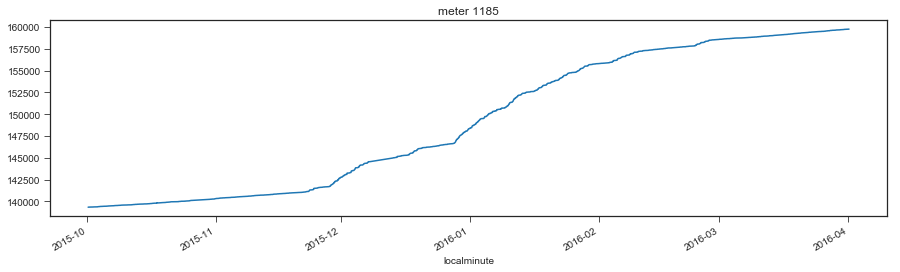

In [38]:
key = 1185
df_i = groups.get_group(key).drop(columns='dataid')
display(len(df_i))

df_i_clean = remove_mal_data(df_i)
display(len(df_i_clean))

df_i_clean.meter_value.plot(figsize=(15,4), title=str(f'meter {key}'))

In [39]:
def remove_negative_marginal(df):
    # remove data points where the marginal change (from prev value) is negative.
    return df.loc[df.marginal_change > 0]

In [40]:
def remove_outliers(df, coeff=1.5):
    # remove outliers using *IQR rule.
    tmp_df = df.loc[df.marginal_change > 1]
    Q1 = tmp_df['marginal_change'].quantile(0.25)
    Q3 = tmp_df['marginal_change'].quantile(0.75)
    IQR = Q3 - Q1
    
    #print(f'{Q1, Q3, IQR}')
    
    # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
    return df.query('(@Q1 - @coeff * @IQR) <= marginal_change <= (@Q3 + @coeff * @IQR)')

In [41]:
display(len(df_i_clean))

17804

In [42]:
df_i_filtered = remove_outliers(df_i_clean)
display(len(df_i_filtered))

15089

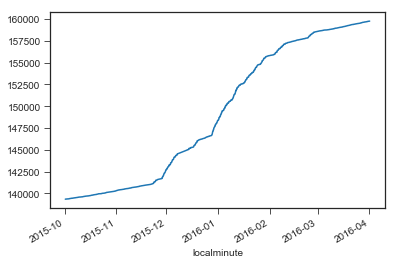

In [43]:
df_i_filtered['meter_value'].plot()

### Apply cleaning, resampling, and 1.5IQR-filtering to entire 6 month period.

18456

meter_value
localminute                     
2015-10-01 10:00:00     139338.0
2015-10-01 11:00:00     139345.0
2015-10-01 12:00:00     139345.0
2015-10-01 13:00:00     139348.0
2015-10-01 14:00:00     139348.0

meter_value  marginal_change
localminute                                      
2015-10-01 10:00:00     139338.0              NaN
2015-10-01 11:00:00     139345.0              7.0
2015-10-01 12:00:00     139345.0              0.0
2015-10-01 13:00:00     139348.0              3.0
2015-10-01 14:00:00     139348.0              0.0

4386

3825

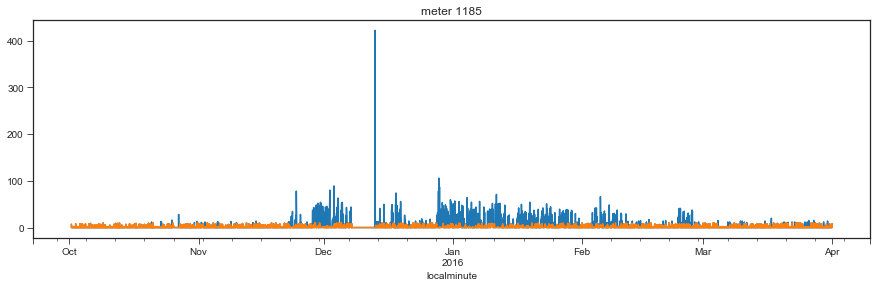

In [44]:
for key in suspicious_meters_list:
    df_i = groups.get_group(key).drop(columns='dataid')
    display(len(df_i))

    
    # first, clean data by removing obvious dirt
    df_i_clean = remove_mal_data(df_i)
    df_i_clean = remove_negative_marginal(df_i_clean)
    
    # next, resample data by hour.
    df_i_resampled = df_i_clean.drop(columns='marginal_change').resample('H').mean().ffill()
    display(df_i_resampled.head())
    
    # then, obtain new marginal changes.
    df_i_resampled['marginal_change'] = df_i_resampled['meter_value'].diff()
    display(df_i_resampled.head())
    df_i_resampled['marginal_change'].plot(figsize=(15,4), title=str(f'meter {key}'))
    display(len(df_i_resampled))
    
    # finally, filter by the 1.5IQR rule on marginal_change.
    df_i_filtered = remove_outliers(df_i_resampled)
    display(len(df_i_filtered))

    df_i_filtered['marginal_change'].plot(figsize=(15,4), title=str(f'meter {key}'))
    break

Above code snippet and output shows that IQR-filtering should not be applied to the entire 6 months, because of seasonal changes in household use of gas.

In [64]:
### key = 1185
df_i = groups.get_group(key).drop(columns='dataid')
display(len(df_i))

# zoom into 1 month
df_i_1mth = zoom(df_i, '2016-02-01', '2016-03-01')

def clean_resample_filter(df_i):
    
    # first, clean data by removing obvious dirt
    df_i_clean = remove_mal_data(df_i_1mth)
    df_i_clean = remove_negative_marginal(df_i_clean)

    # next, resample data by hour.
    df_i_resampled = df_i_clean.drop(columns='marginal_change').resample('H').mean().ffill()
    #display(df_i_resampled.head())

    # then, obtain new marginal changes.
    df_i_resampled['marginal_change'] = df_i_resampled['meter_value'].diff()
    
    # finally, filter by the IQR rule on marginal_change.
    # 1.5IQR filter
    df_i_filtered15 = remove_outliers(df_i_resampled, 1.5)
    
    # plot
    df_i_resampled['marginal_change'].plot(figsize=(15,4), title=str(f'meter {key}'))
    df_i_filtered15['marginal_change'].plot(figsize=(15,4), \
                                            title=str(f'meter {key}, bef:{len(df_i_resampled)}, aft:{len(df_i_filtered15)}'))
    plt.show()
    plt.cla()
    
    # 3.0IQR filter
    df_i_filtered30 = remove_outliers(df_i_resampled, 4.0)
    
    # plot
    df_i_resampled['marginal_change'].plot(figsize=(15,4), title=str(f'meter {key}'))
    df_i_filtered30['marginal_change'].plot(figsize=(15,4), \
                                            title=str(f'meter {key}, bef:{len(df_i_resampled)}, aft:{len(df_i_filtered30)}'))
    plt.show()
    plt.clf()

1540

C:\Users\Melvin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


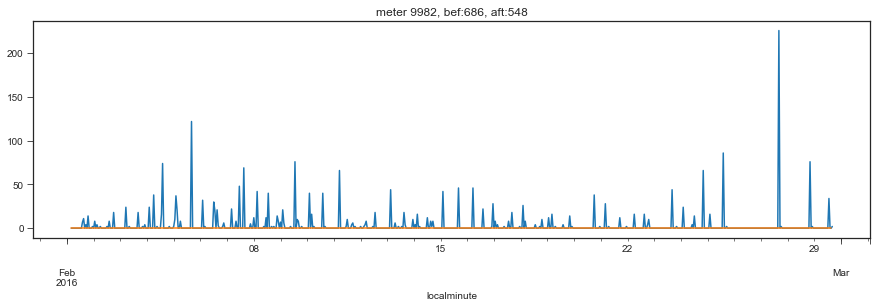

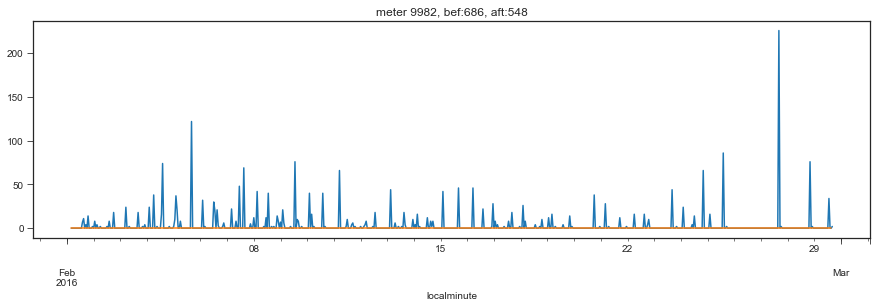

<Figure size 432x288 with 0 Axes>

In [65]:
clean_resample_filter(df_i_1mth)

IQR-filtering seems more reasonable after constraining the time period to one month.

18456

C:\Users\Melvin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


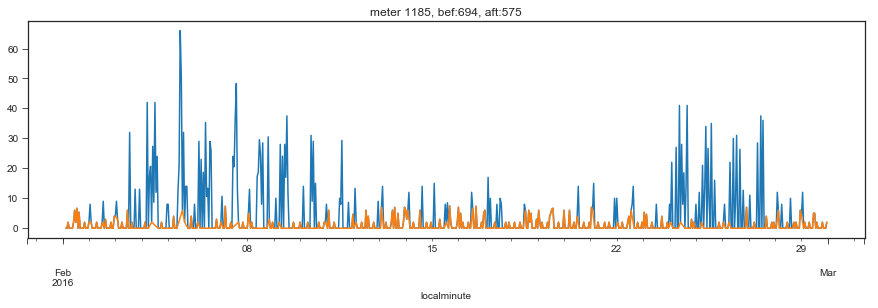

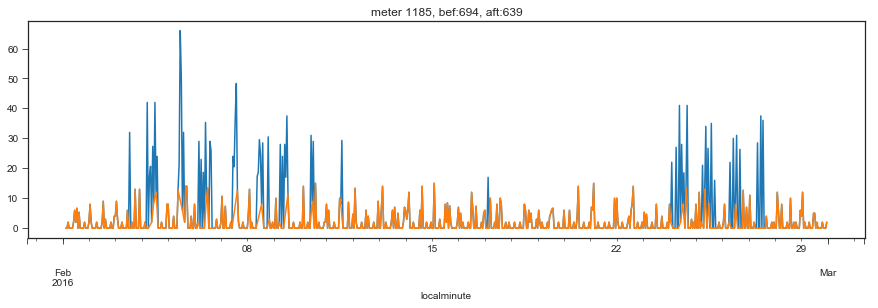

3690

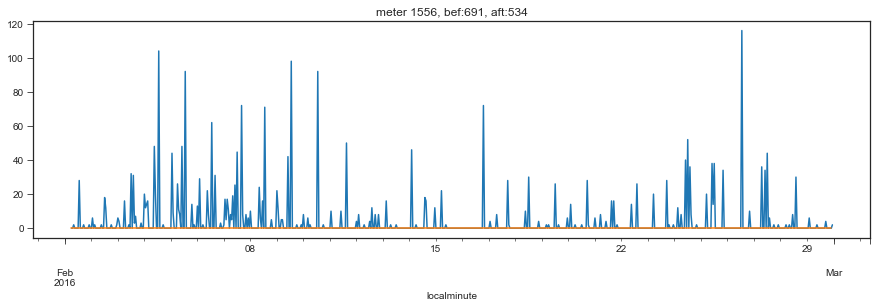

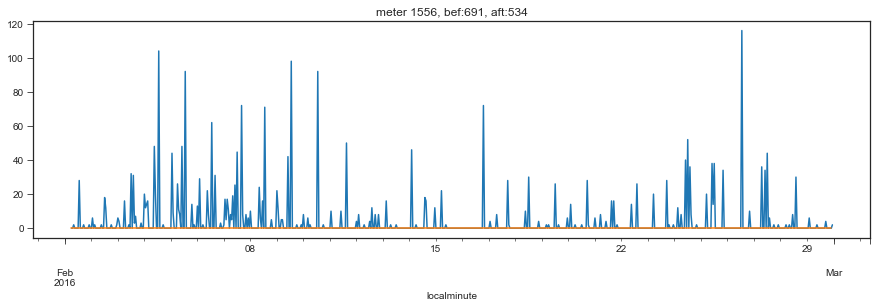

8910

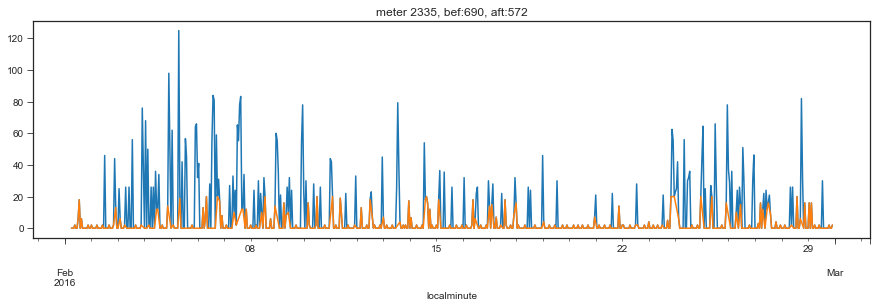

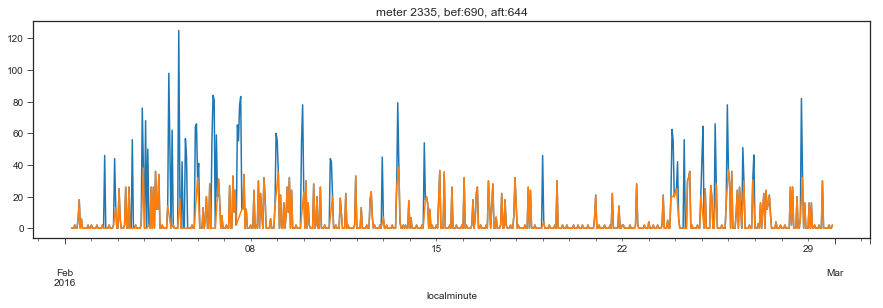

5449

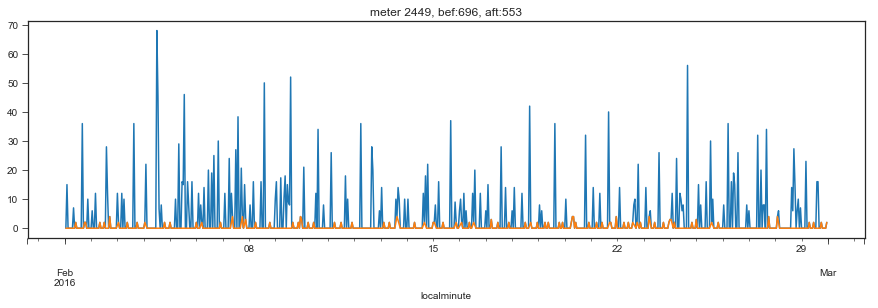

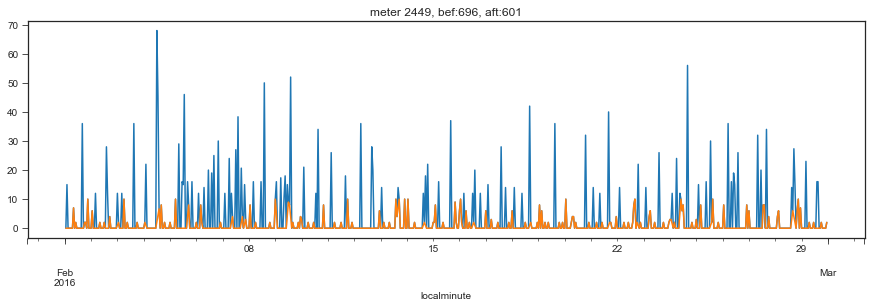

4017

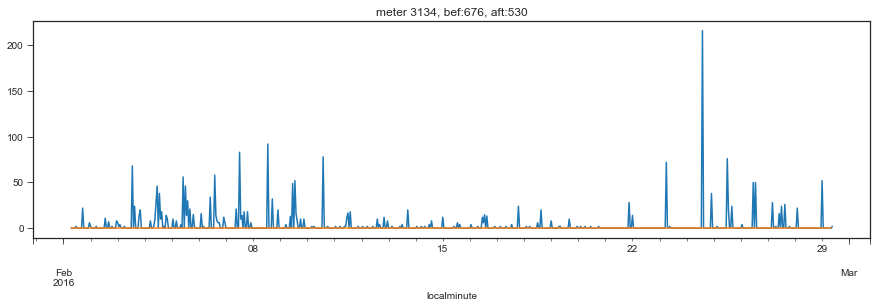

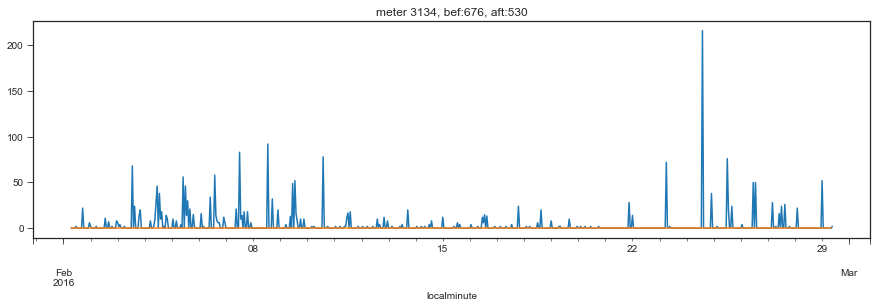

2221

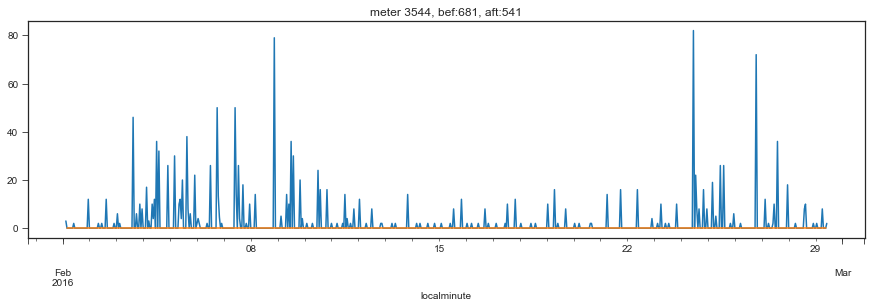

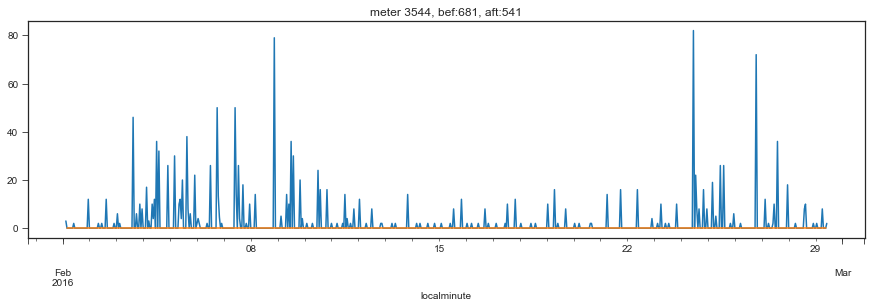

9158

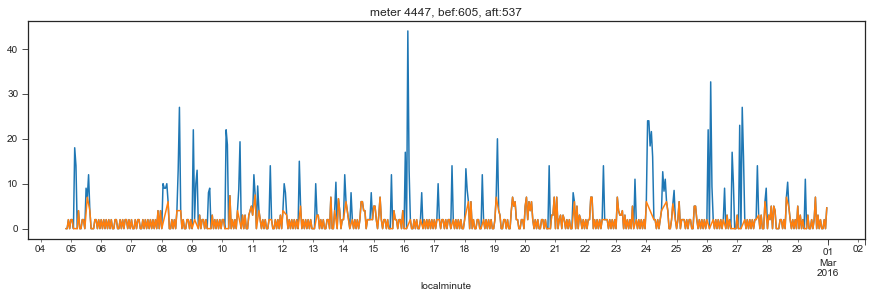

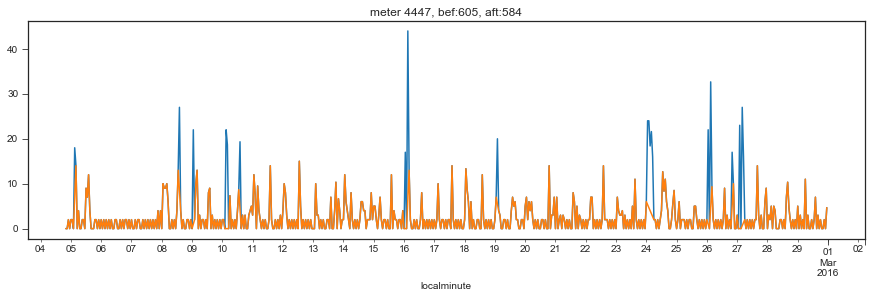

19074

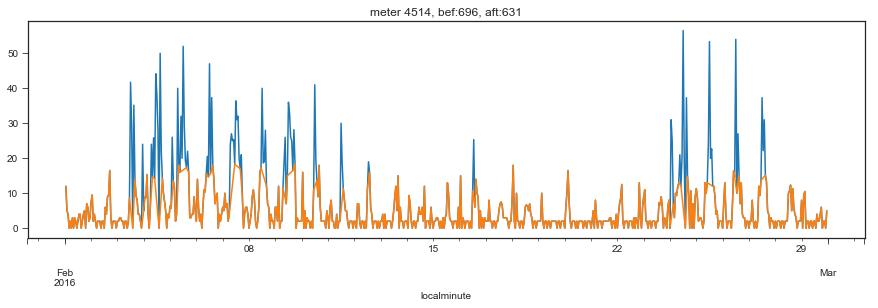

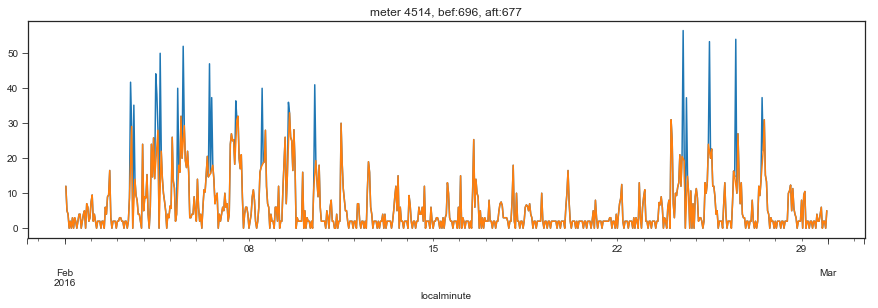

4486

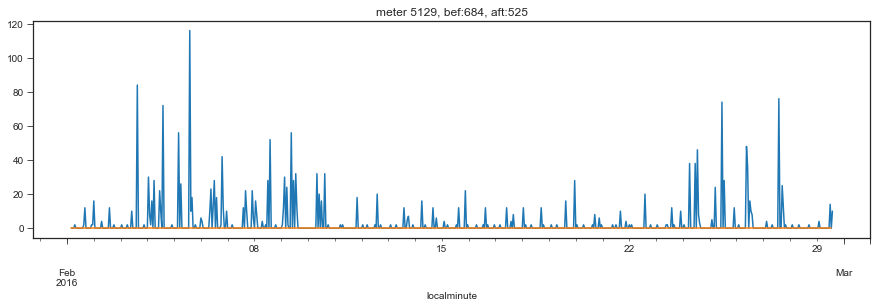

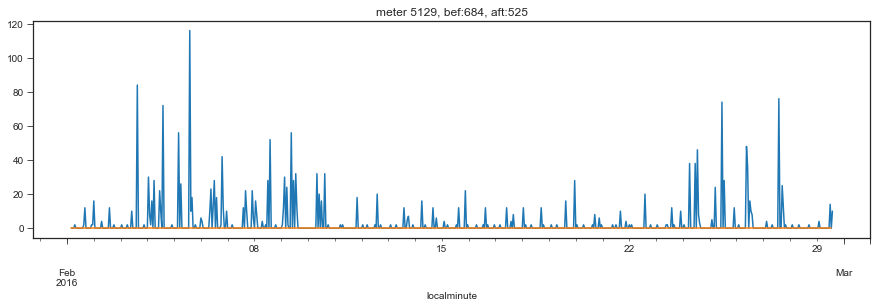

25559

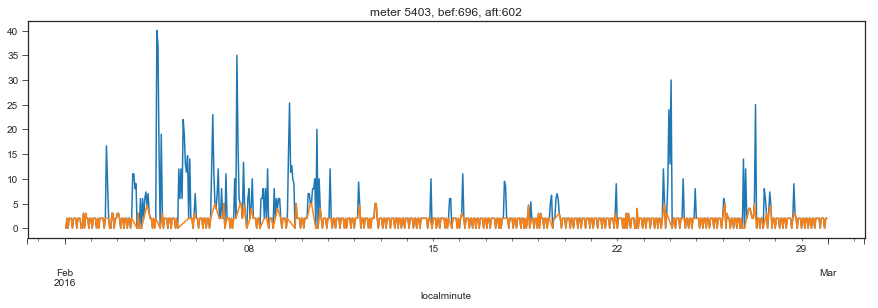

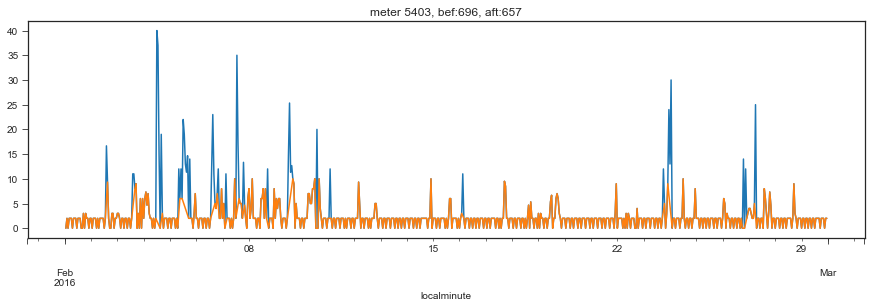

4520

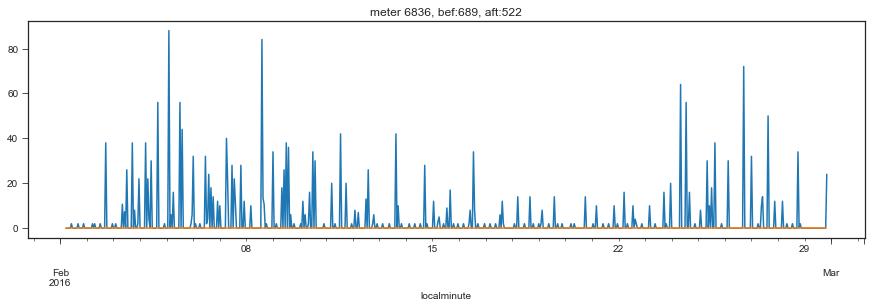

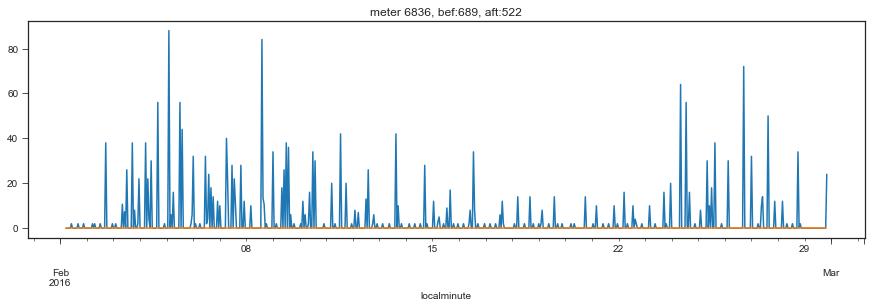

17915

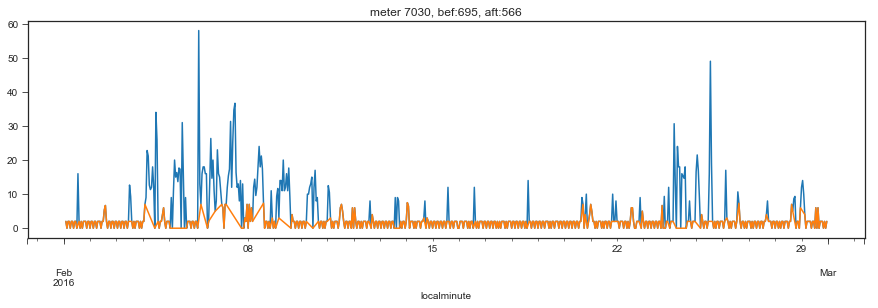

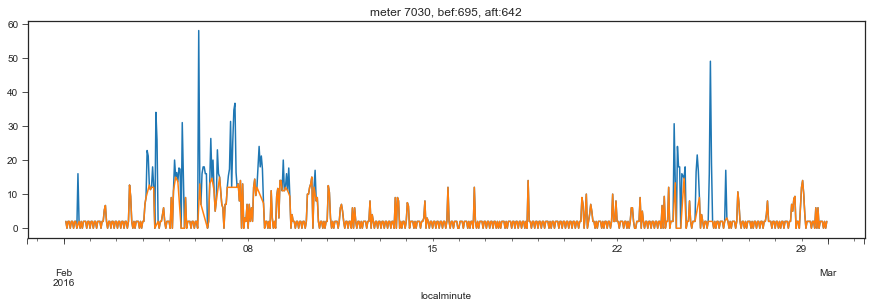

20493

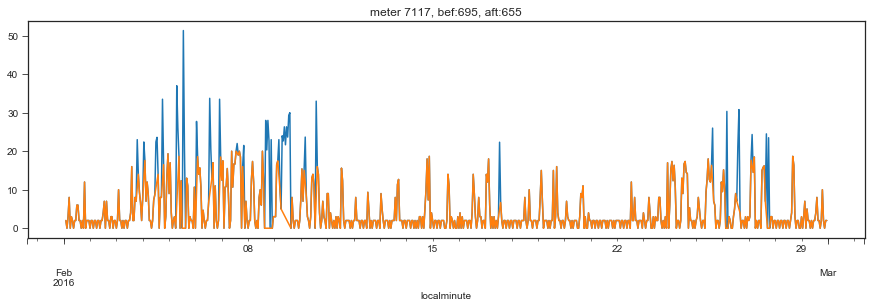

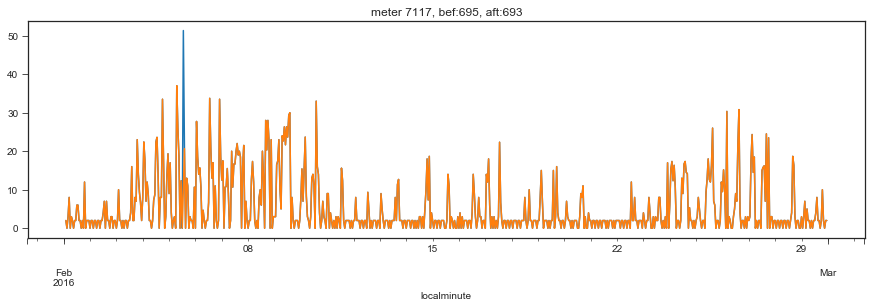

25296

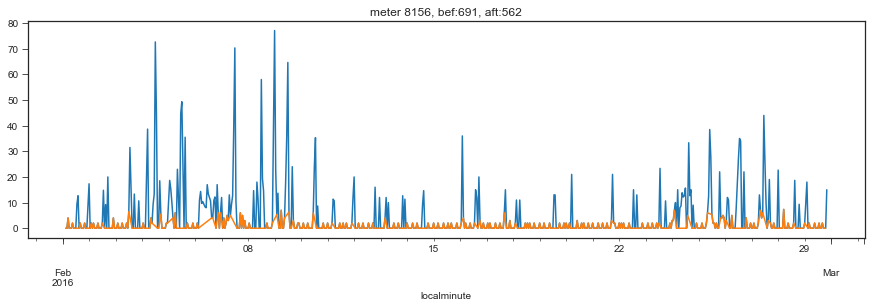

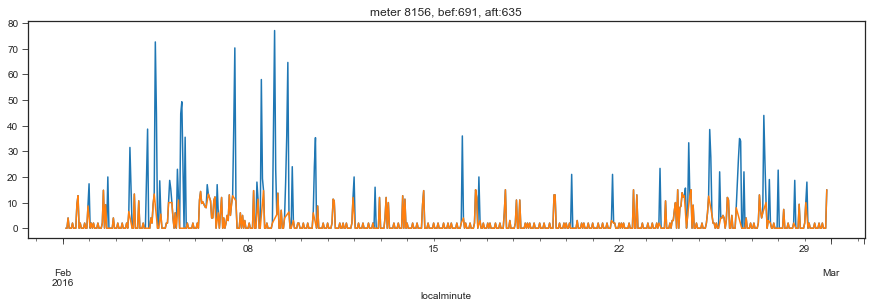

14064

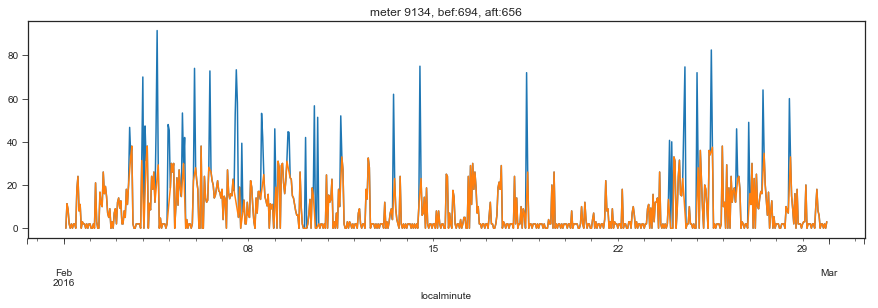

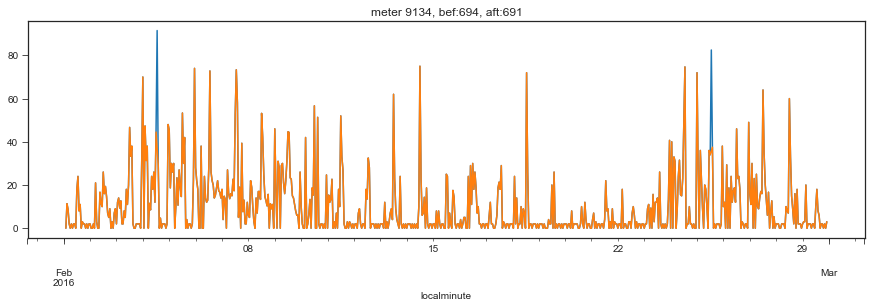

13796

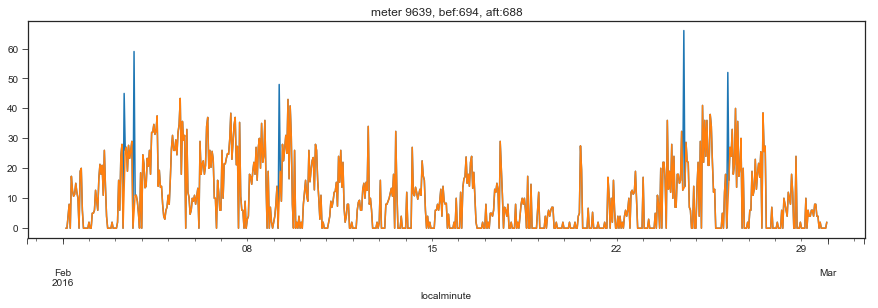

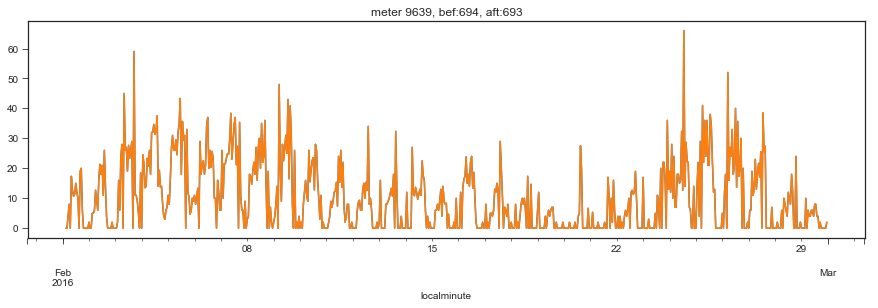

1540

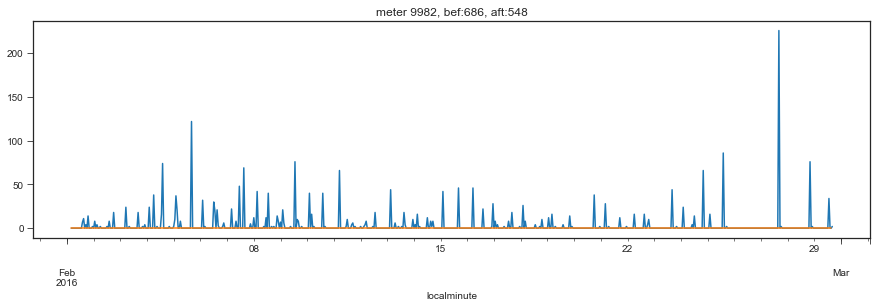

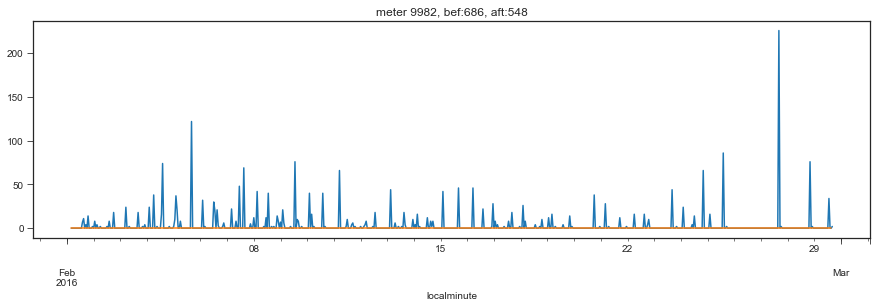

<Figure size 432x288 with 0 Axes>

In [52]:
for key in suspicious_meters_list:
    df_i = groups.get_group(key).drop(columns='dataid')
    display(len(df_i))
    df_i_1mth = zoom(df_i, '2016-02-01', '2016-03-01')
    clean_resample_filter(df_i)

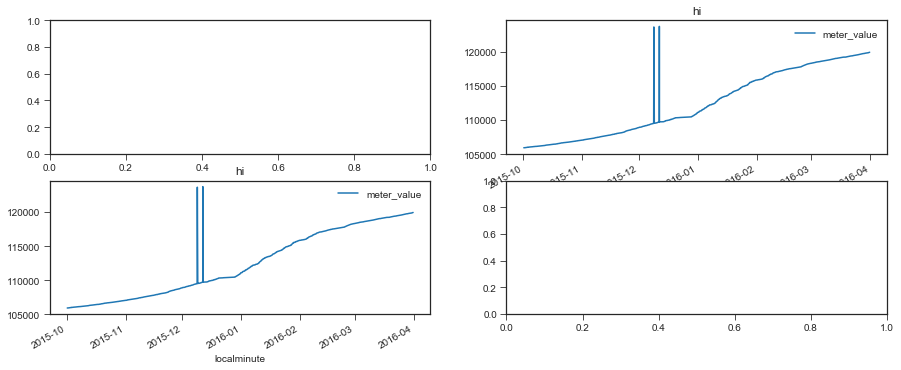

In [116]:
# Plotting test
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,6))

df_i.plot(ax=axes[0,0], title='hi')
df_i.plot(ax=axes[0,1], title='hi')
df_i.plot(ax=axes[1,0], title='hi')
axes[0,0].clear()

In [117]:
df_i.plot(ax=axes[0,0], title='hi')
df_i.plot(ax=axes[0,1], title='hi')
df_i.plot(ax=axes[1,0], title='hi')

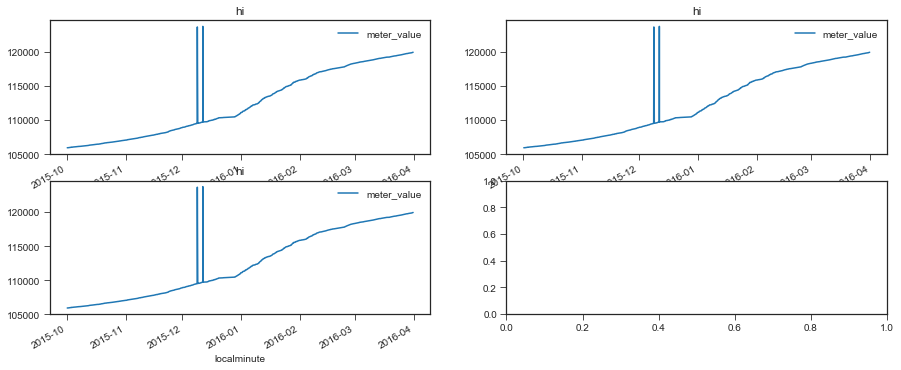

In [118]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,6))  
# seems like I must call this again everytime i plot in a new cell?
# otherwise, no plot is shown when I call plot().

df_i.plot(ax=axes[0,0], title='hi')
df_i.plot(ax=axes[0,1], title='hi')
df_i.plot(ax=axes[1,0], title='hi')

C:\Users\Melvin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


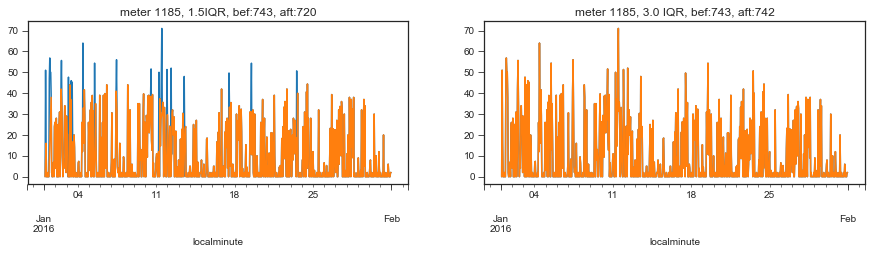

In [177]:
# zoom into 1 month
key = 1185
df_i = groups.get_group(key).drop(columns='dataid')
df_i_1mth = zoom(df_i, '2016-01-01', '2016-02-01')

def clean_resample_filter2(key, df_i):
    # v2 of this method uses/tests multiple plots
    # pre-condition, df_i has has numerical data to plot.
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,3))  
    
    # first, clean data by removing obvious dirt
    df_i_clean = remove_mal_data(df_i_1mth)
    df_i_clean = remove_negative_marginal(df_i_clean)

    # next, resample data by hour.
    df_i_resampled = df_i_clean.drop(columns='marginal_change').resample('H').mean().ffill()
    #display(df_i_resampled.head())

    # then, obtain new marginal changes.
    df_i_resampled['marginal_change'] = df_i_resampled['meter_value'].diff()
    
    # finally, filter by the IQR rule on marginal_change.
    # 1.5IQR filter
    df_i_filtered15 = remove_outliers(df_i_resampled, 1.5)
    
    # plot
    df_i_resampled['marginal_change'].plot(ax=axes[0])
    if len(df_i_filtered15) > 0:
        df_i_filtered15['marginal_change'].plot(ax=axes[0], \
                                            title=str(f'meter {key}, 1.5IQR, bef:{len(df_i_resampled)}, aft:{len(df_i_filtered15)}'))
    # 3.0IQR filter
    df_i_filtered30 = remove_outliers(df_i_resampled, 3.0)
    
    # plot
    df_i_resampled['marginal_change'].plot(ax=axes[1])
    if len(df_i_filtered30) > 0:
        df_i_filtered30['marginal_change'].plot(ax=axes[1], \
                                                title=str(f'meter {key}, 3.0 IQR, bef:{len(df_i_resampled)}, aft:{len(df_i_filtered30)}'))

clean_resample_filter2(key, df_i_1mth)

In [179]:
start = '2016-02-01'
end = '2016-03-01'

lack_data_for_monthx = [] 
for key in keys_list:
    df_i = groups.get_group(key).drop(columns='dataid')
    df_i_1mth = zoom(df_i, start, end)
    
    if len(df_i_1mth) > 1:
        df_i_counts = get_month_counts(df_i_1mth)
        if df_i_counts['count'].values[0] < 3:
            lack_data_for_monthx.append(key)
    else:
        lack_data_for_monthx.append(key)
print(lack_data_for_monthx)

[1403, 2755, 2946, 3036, 4671, 4874, 5317, 6101, 6578, 7566, 8244, 9160, 9600]


C:\Users\Melvin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Melvin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Melvin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too 

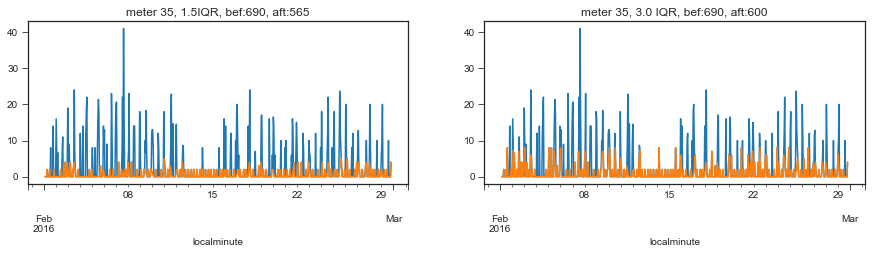

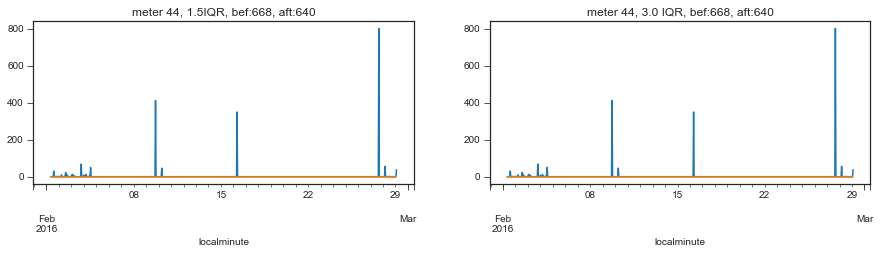

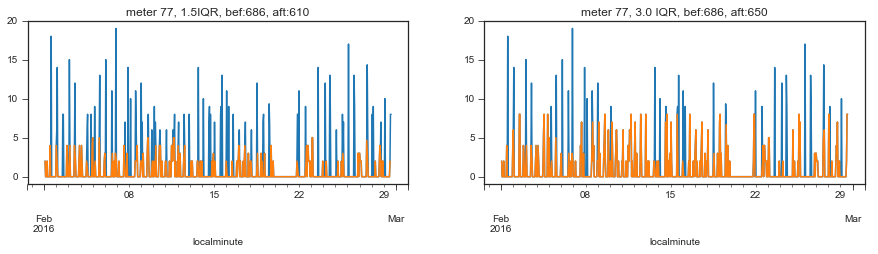

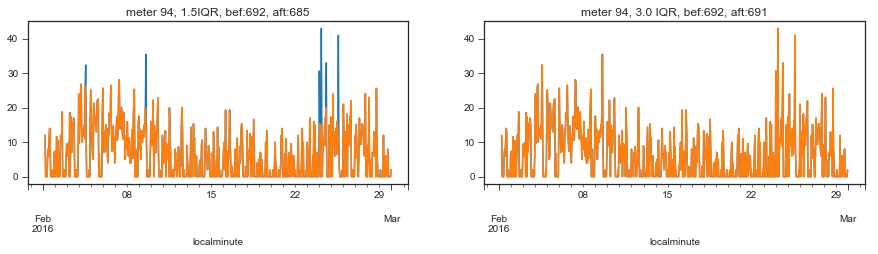

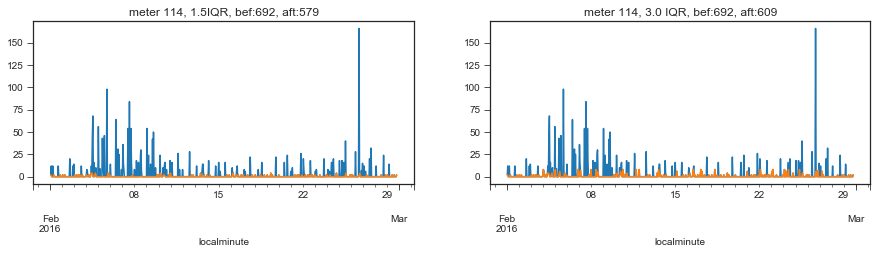

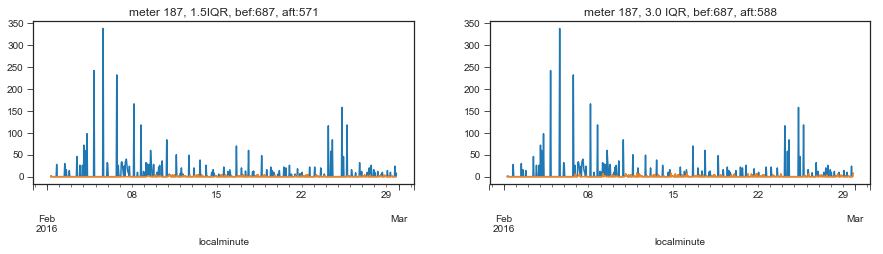

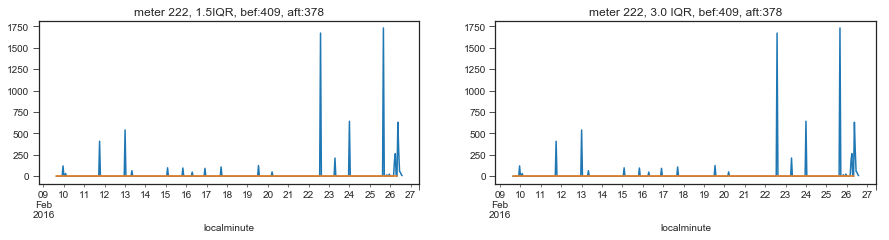

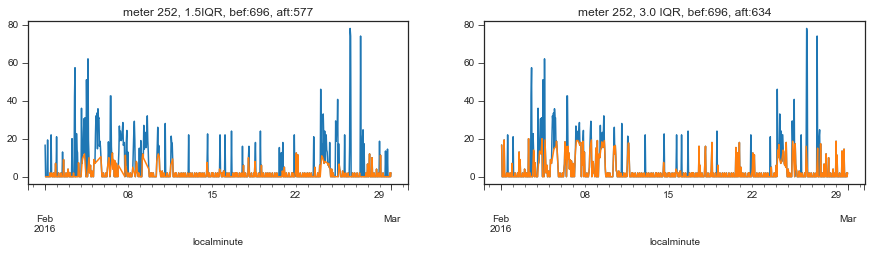

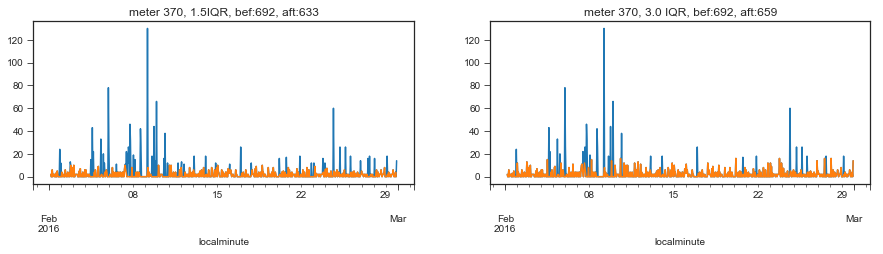

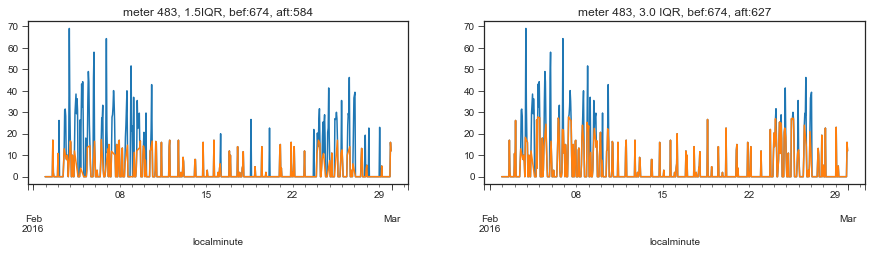

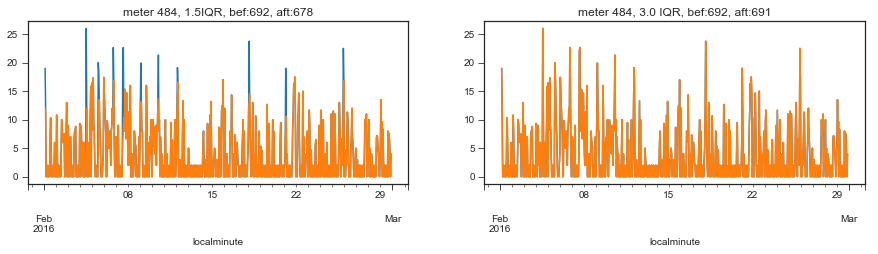

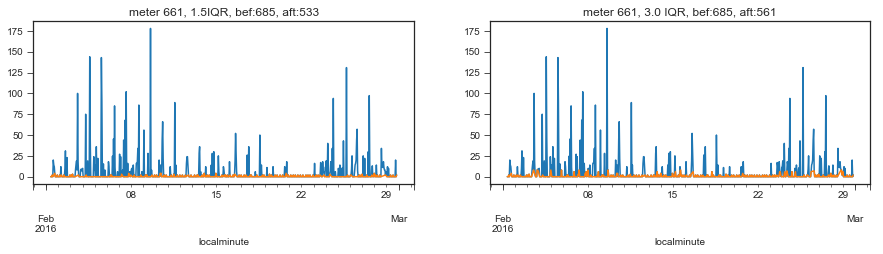

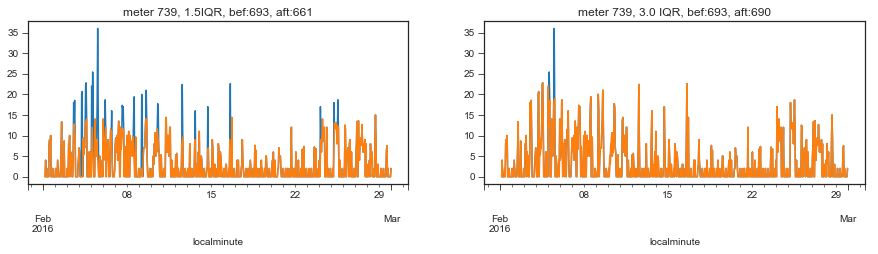

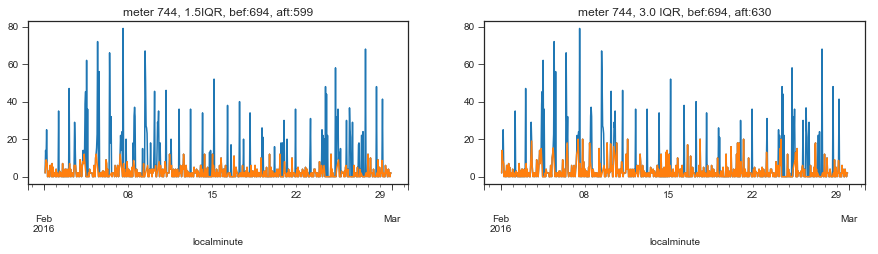

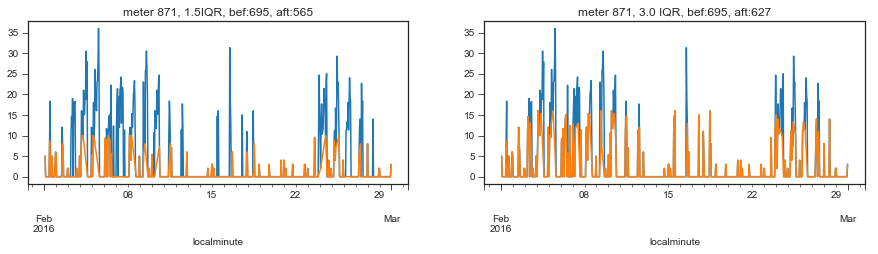

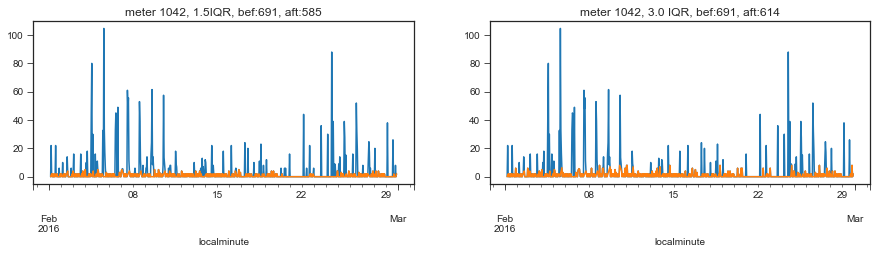

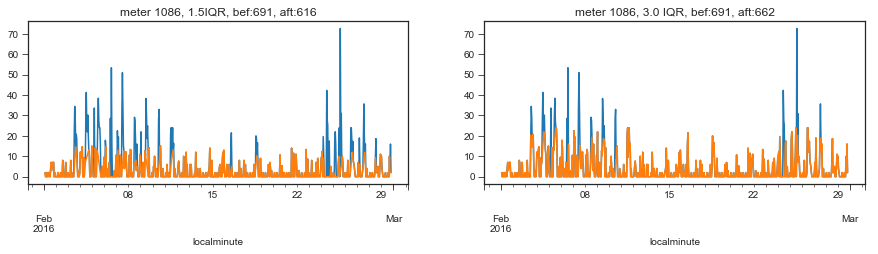

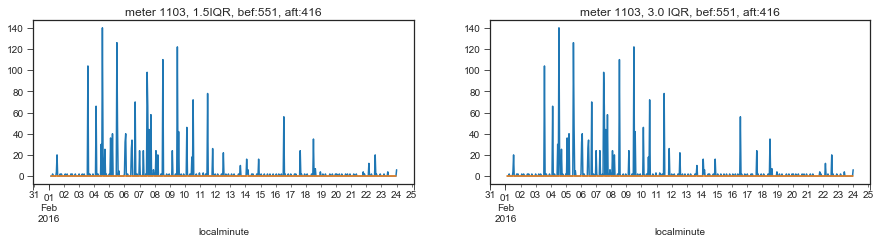

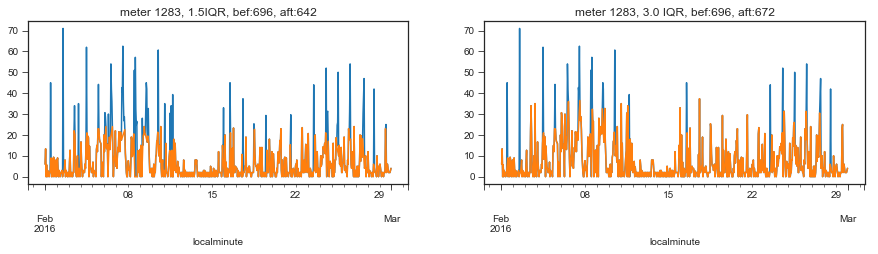

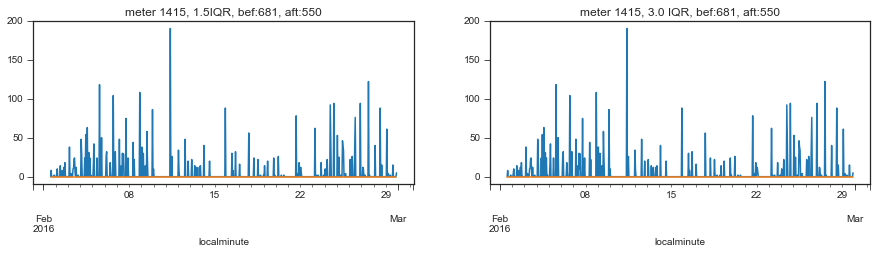

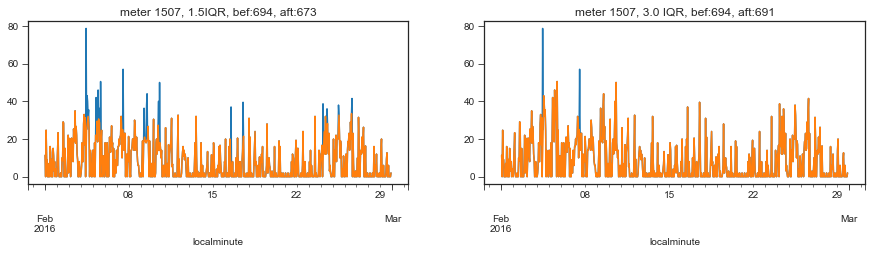

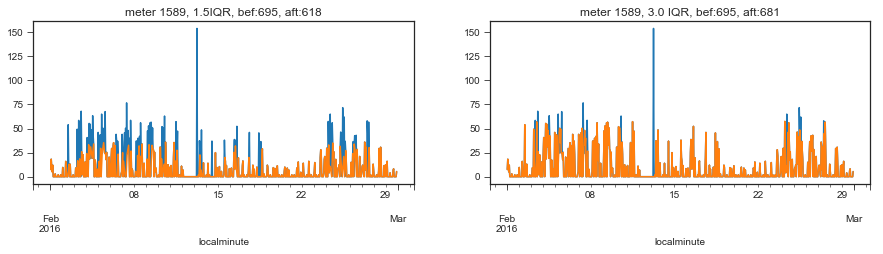

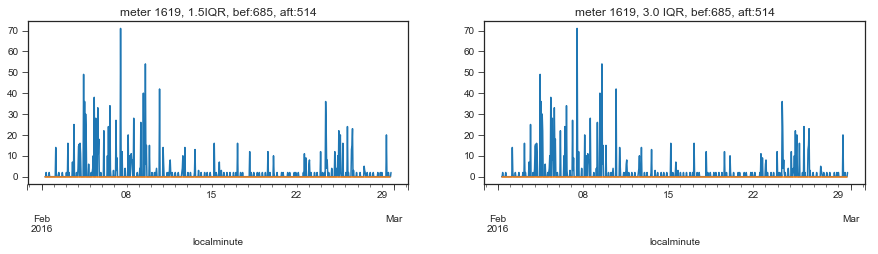

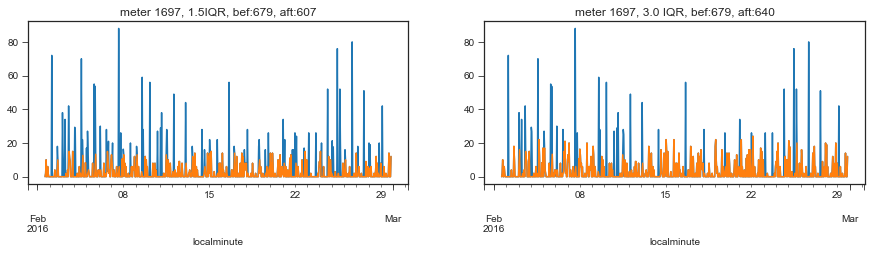

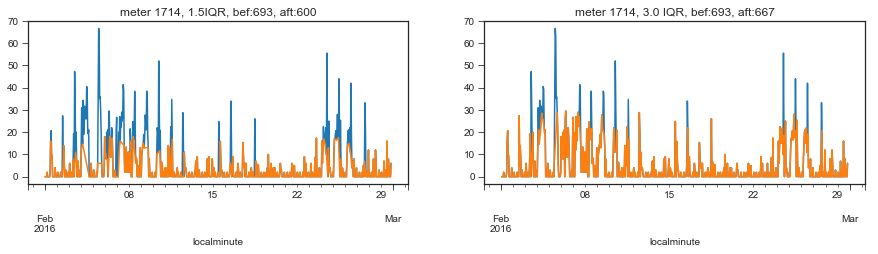

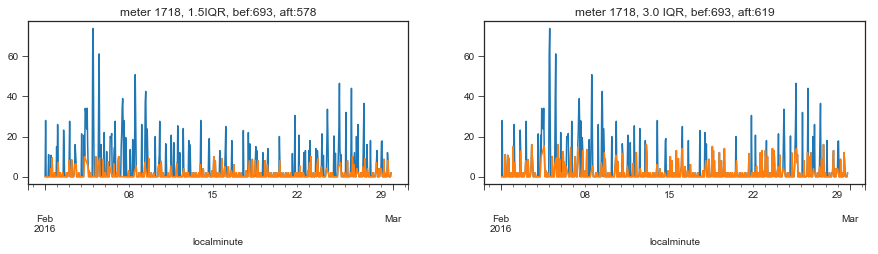

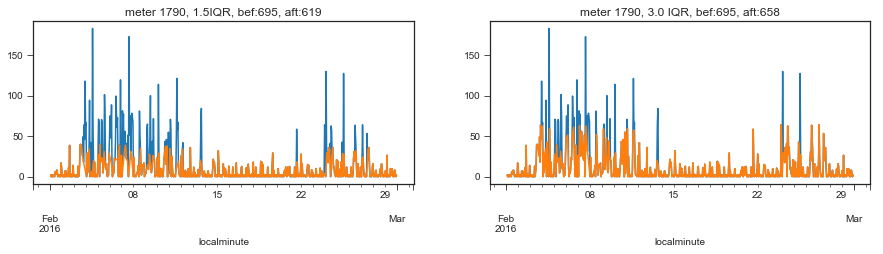

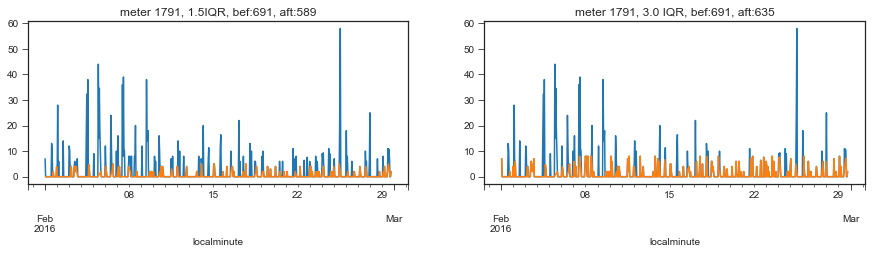

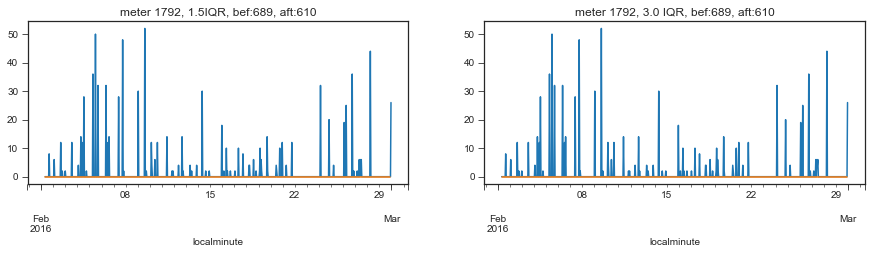

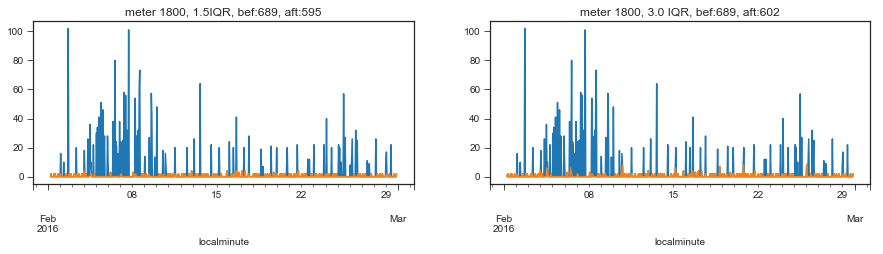

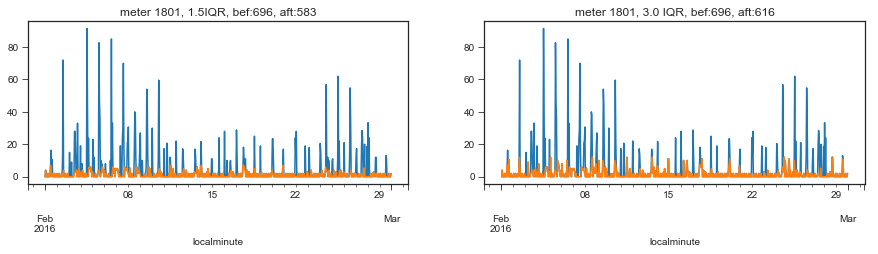

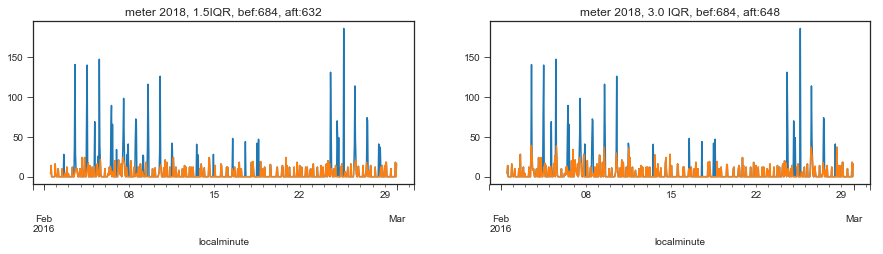

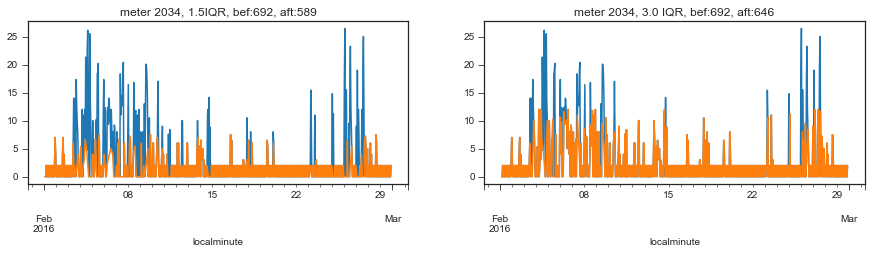

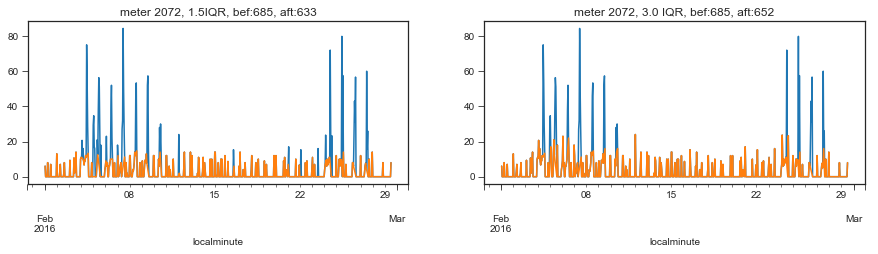

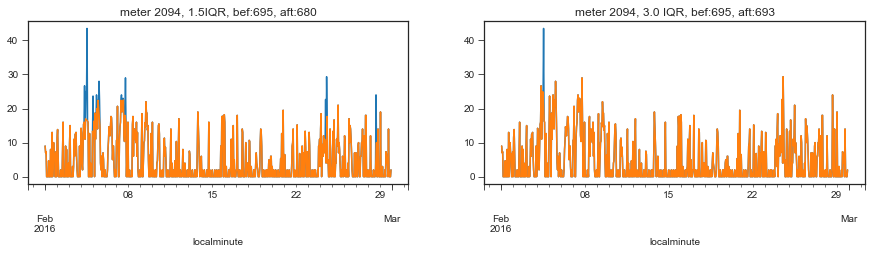

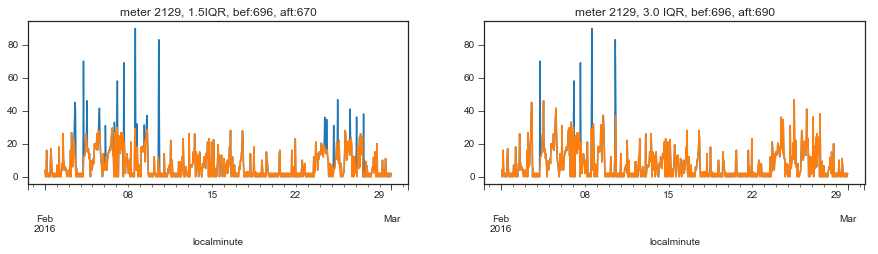

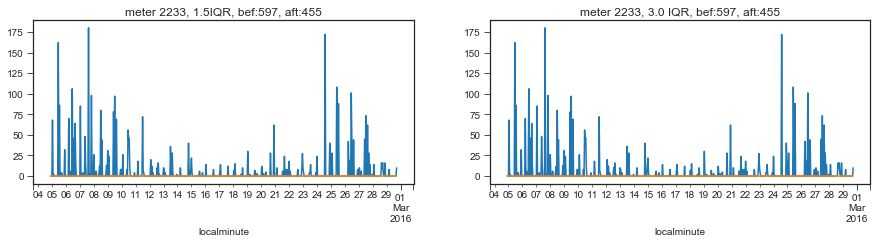

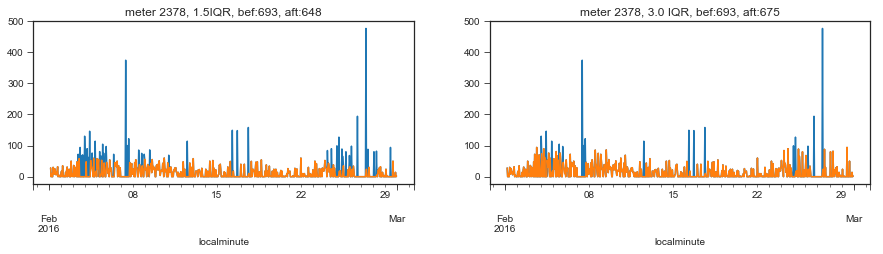

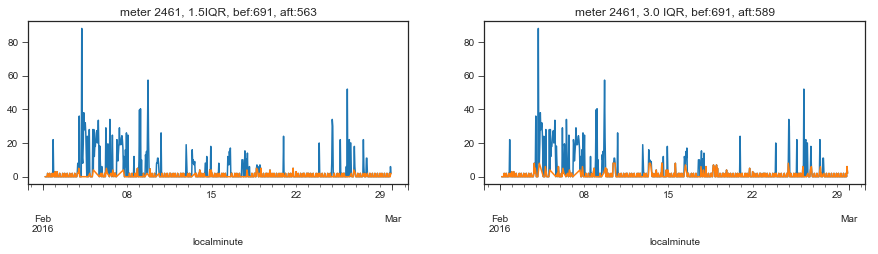

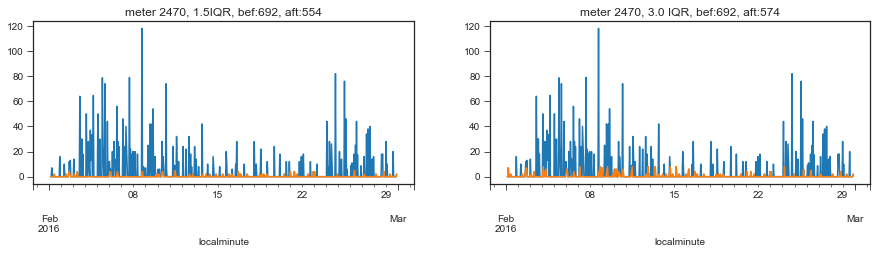

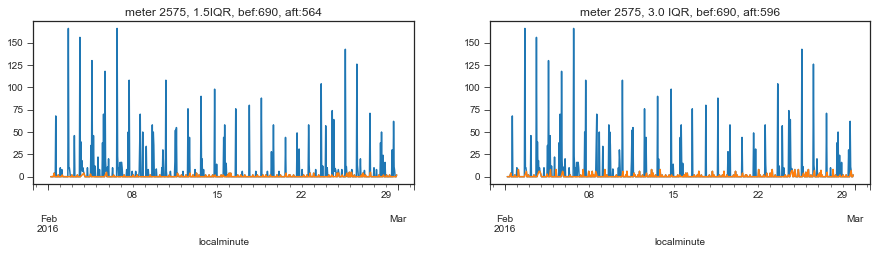

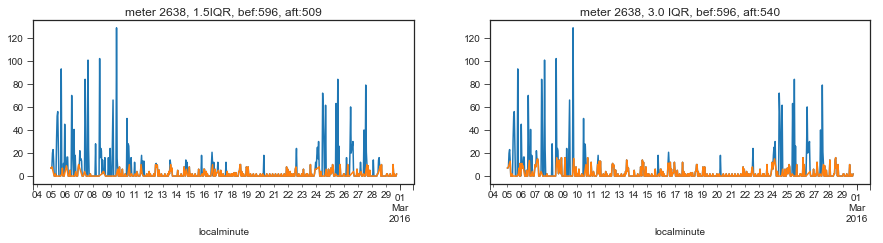

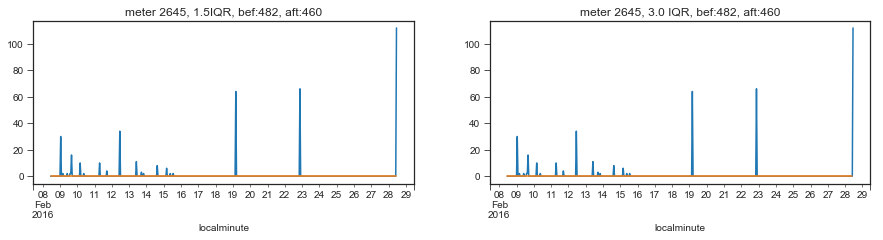

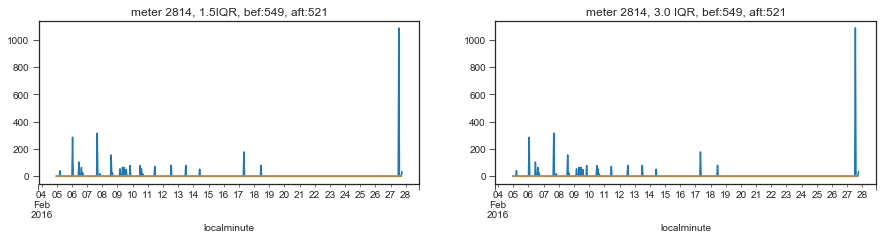

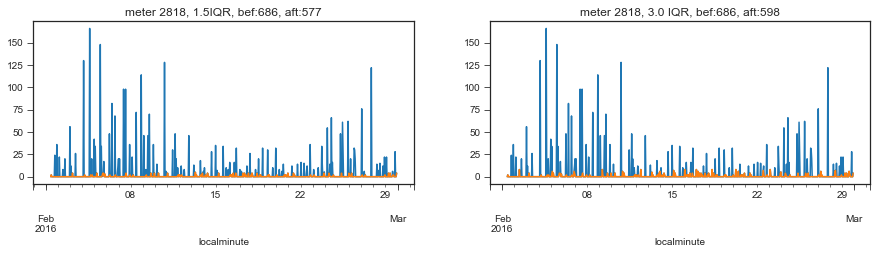

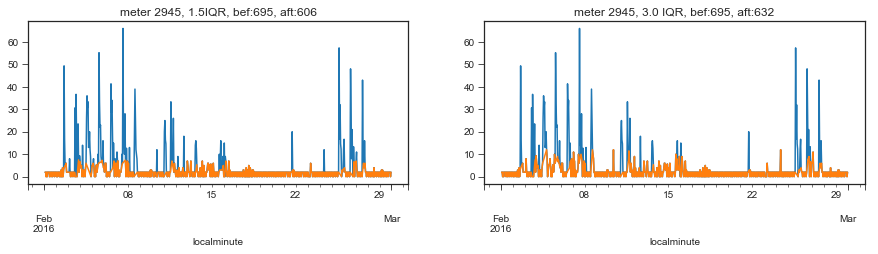

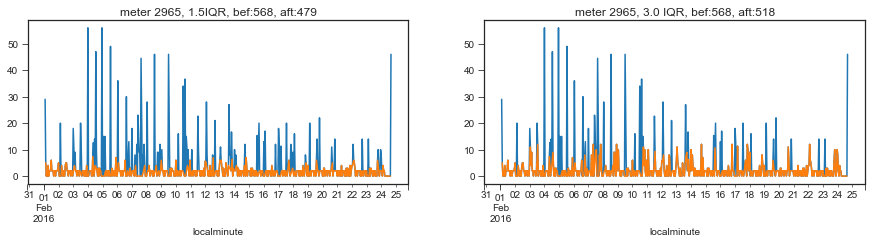

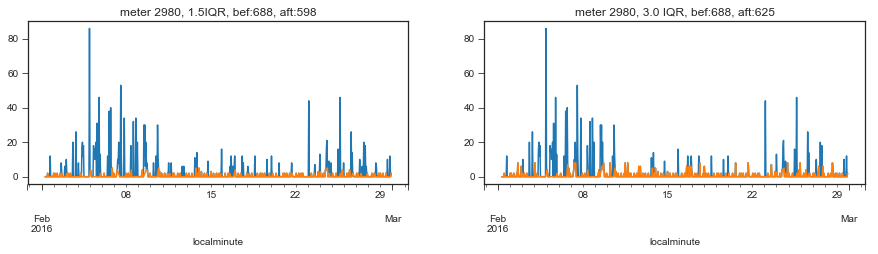

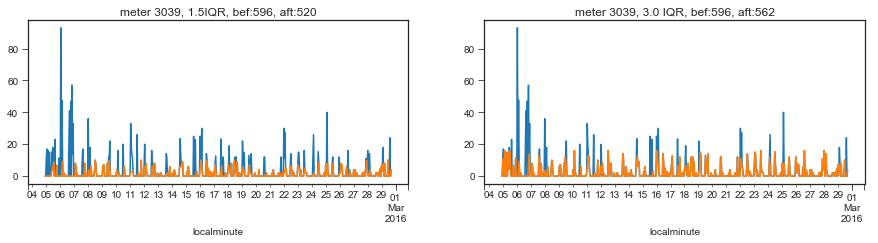

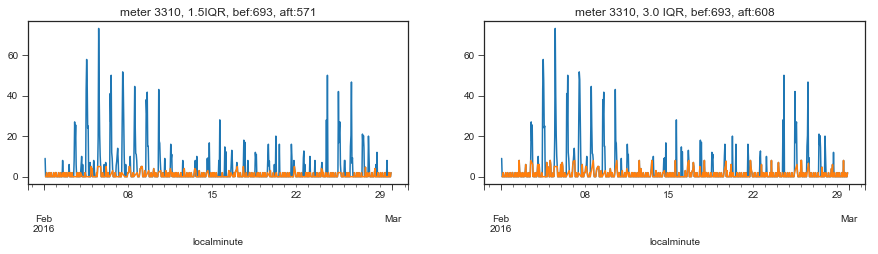

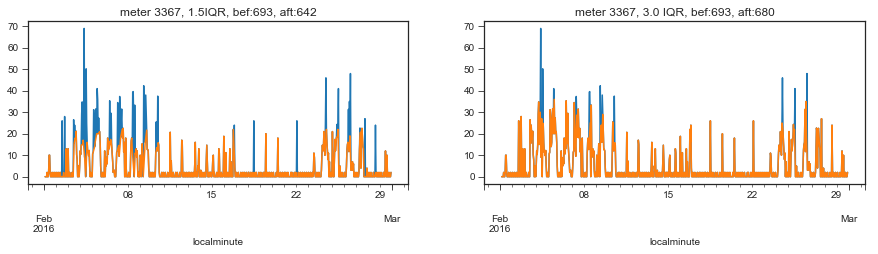

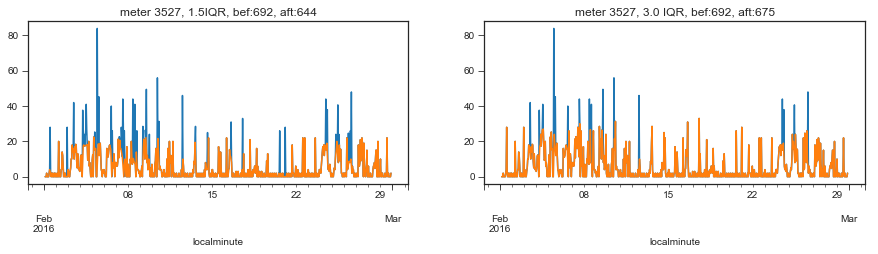

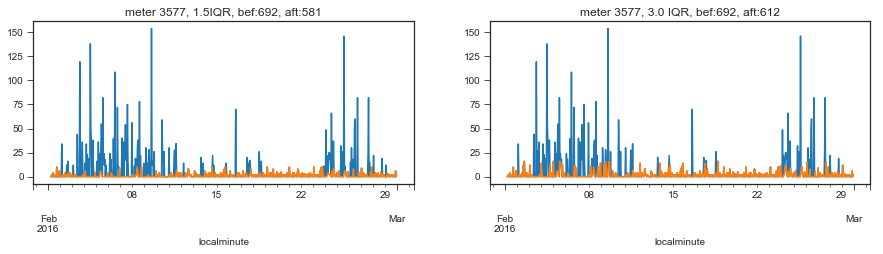

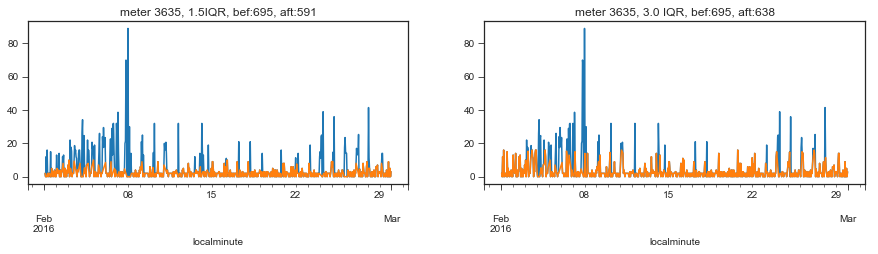

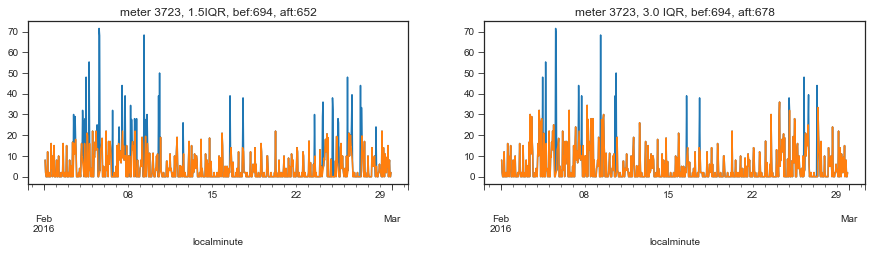

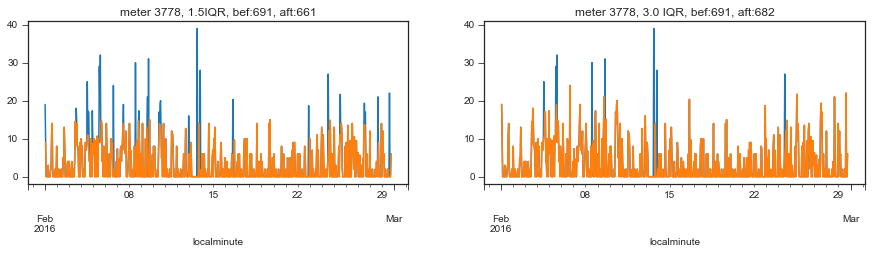

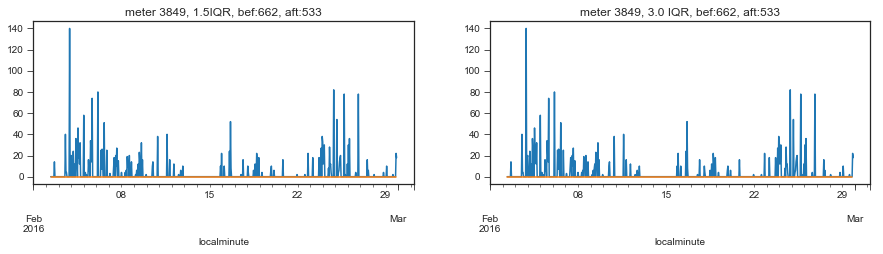

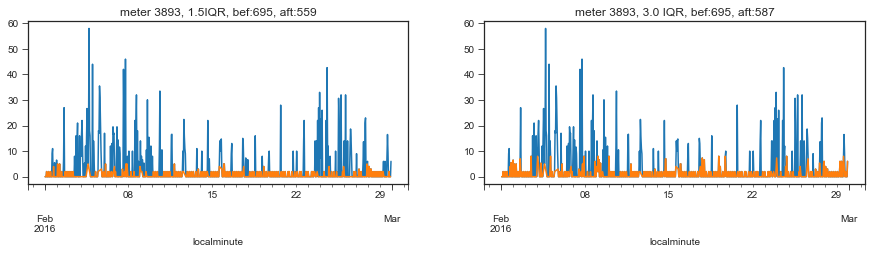

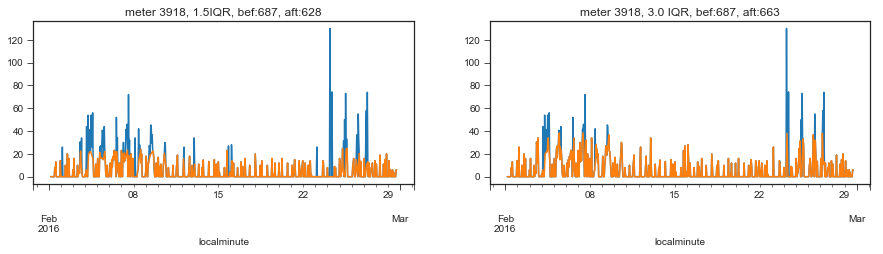

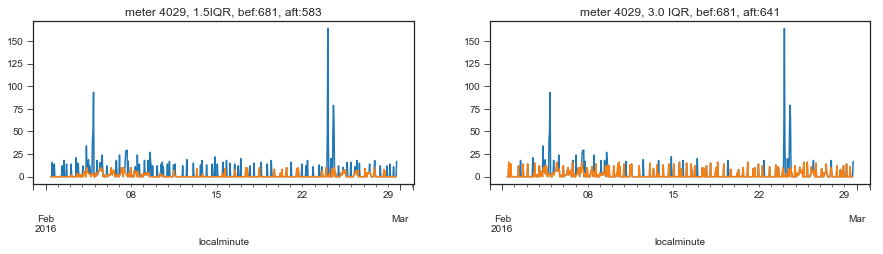

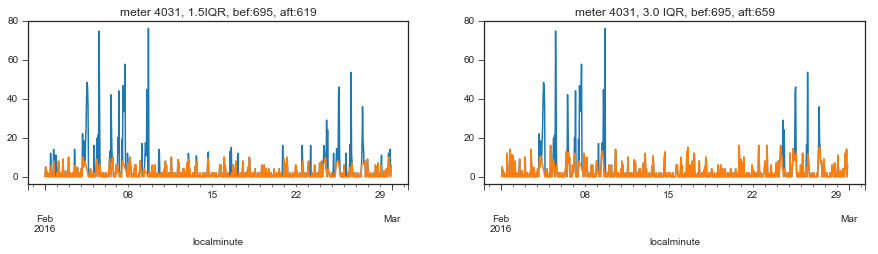

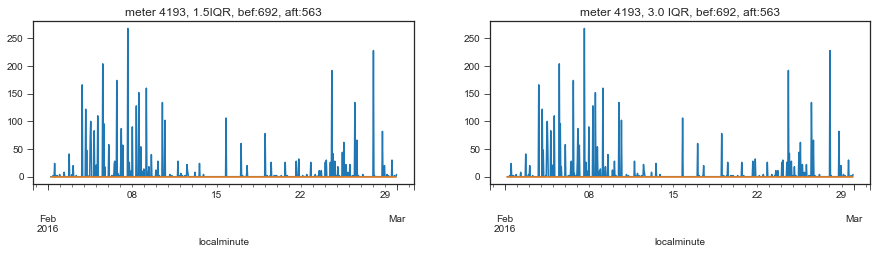

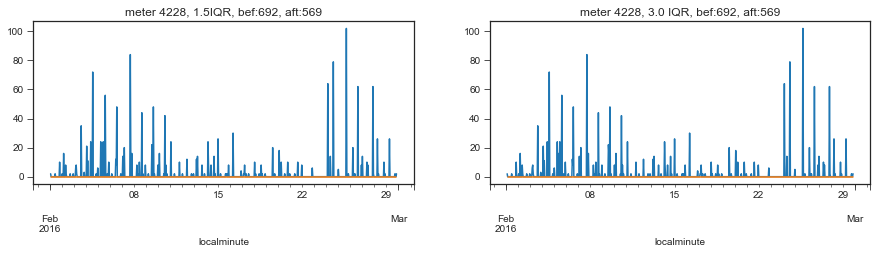

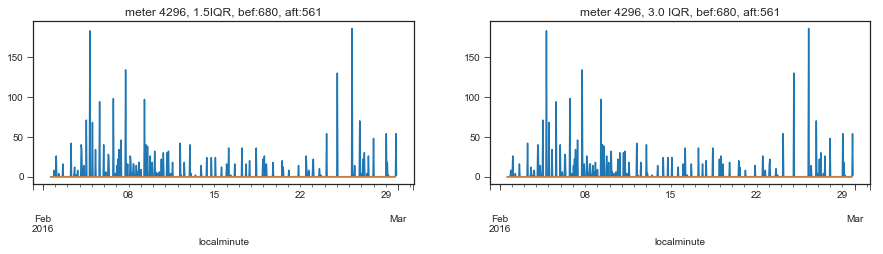

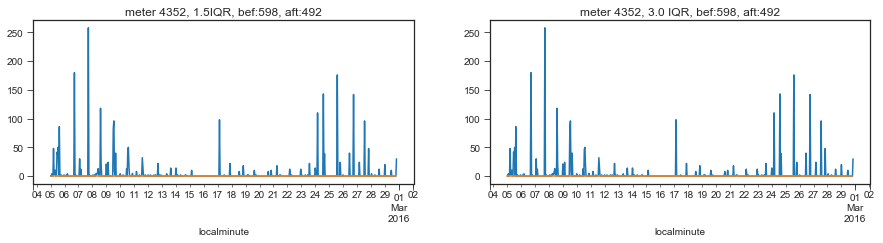

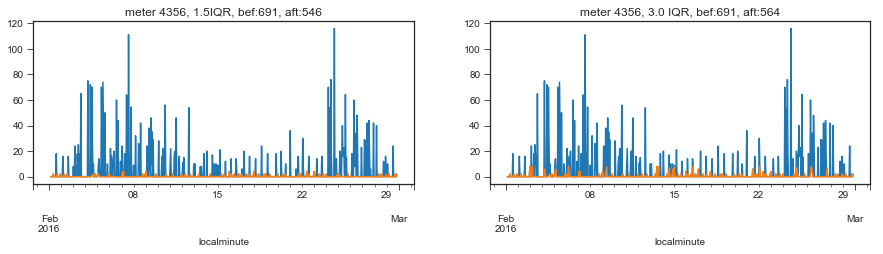

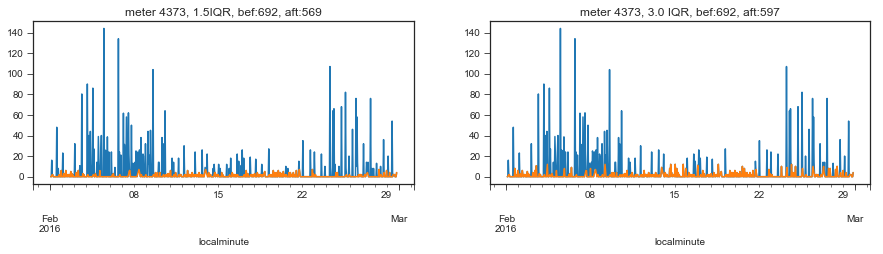

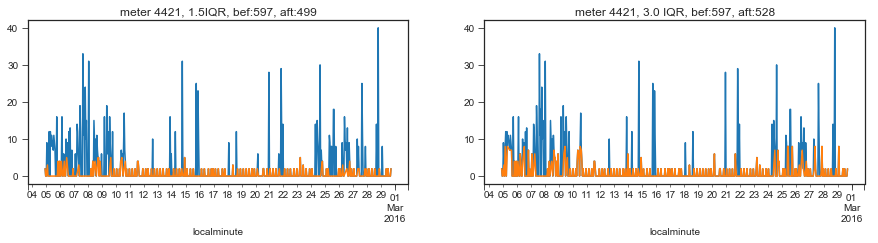

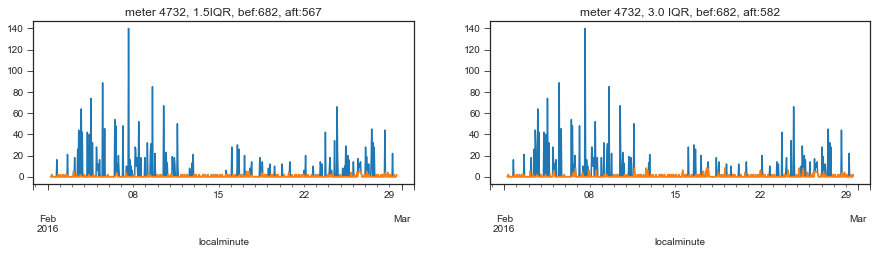

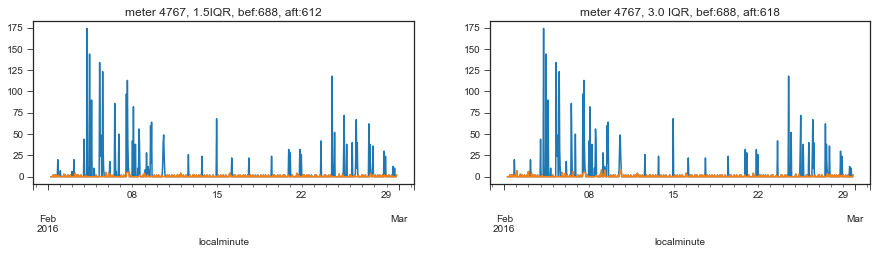

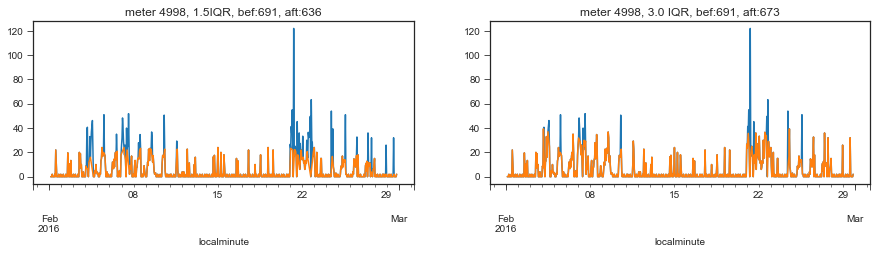

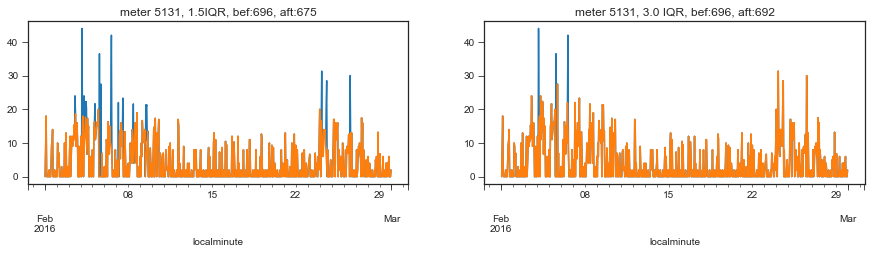

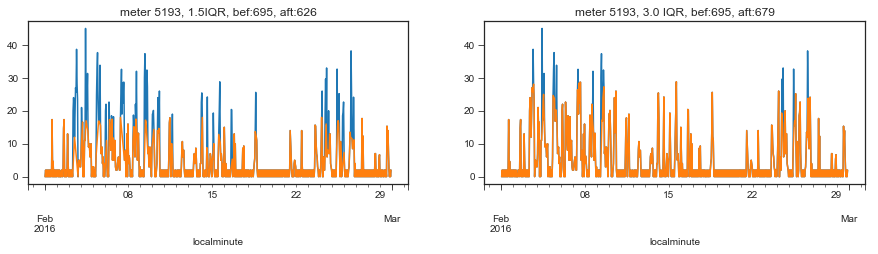

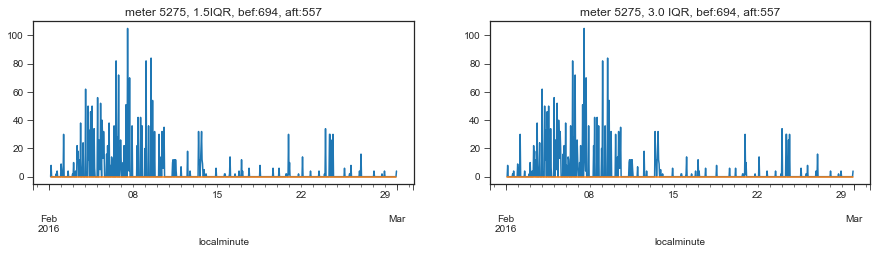

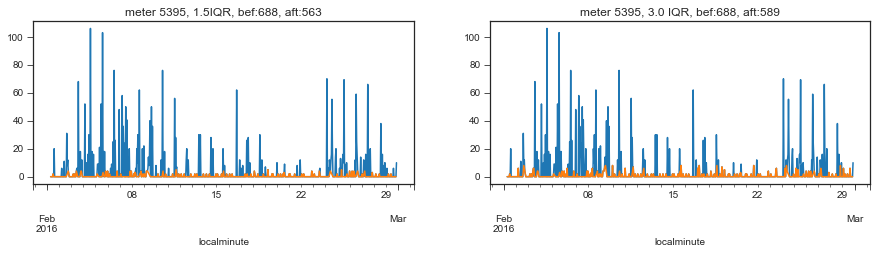

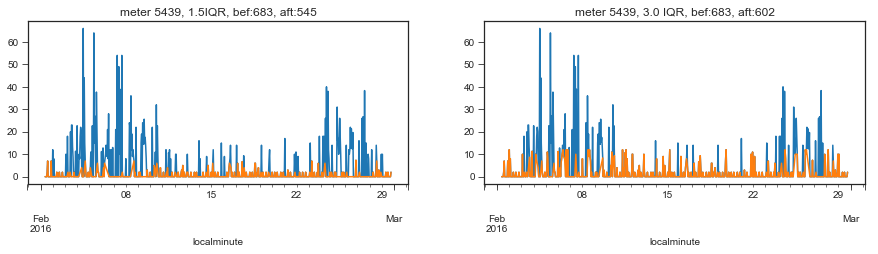

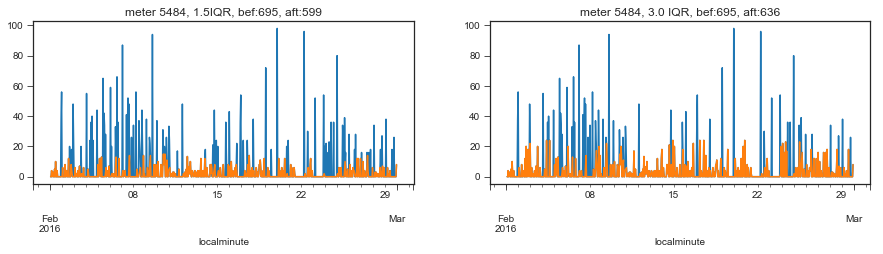

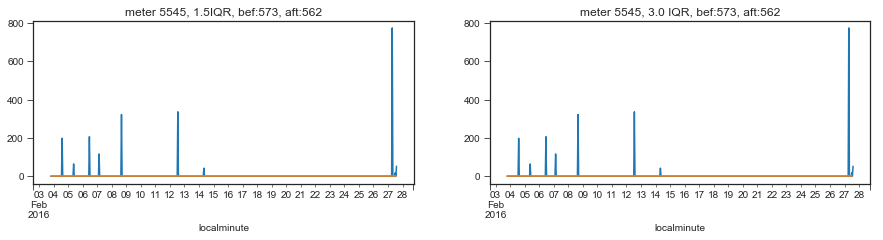

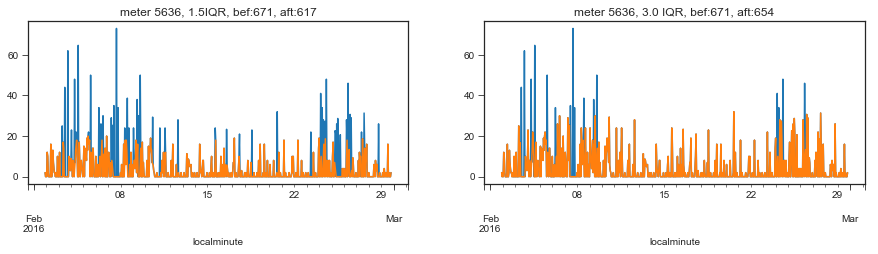

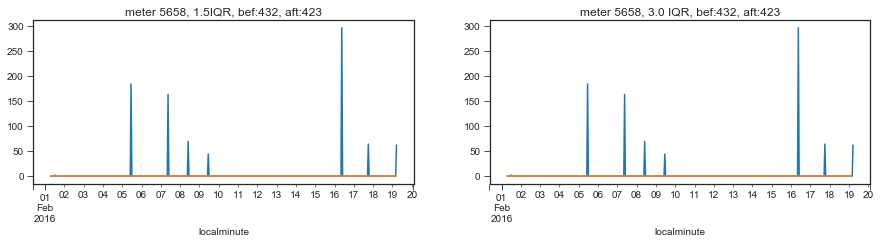

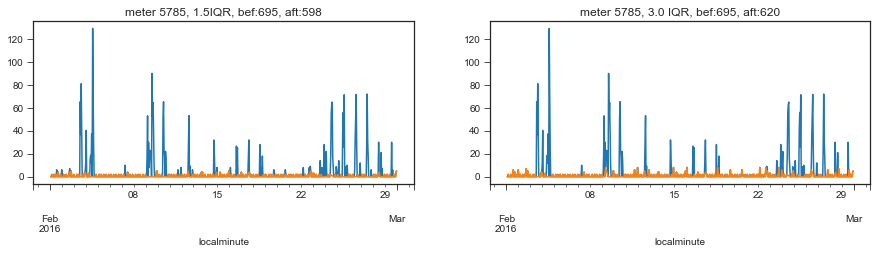

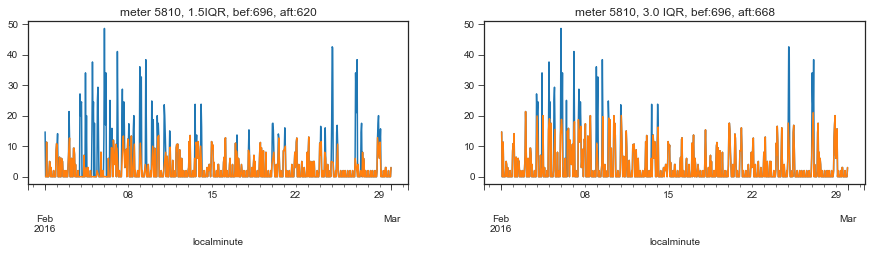

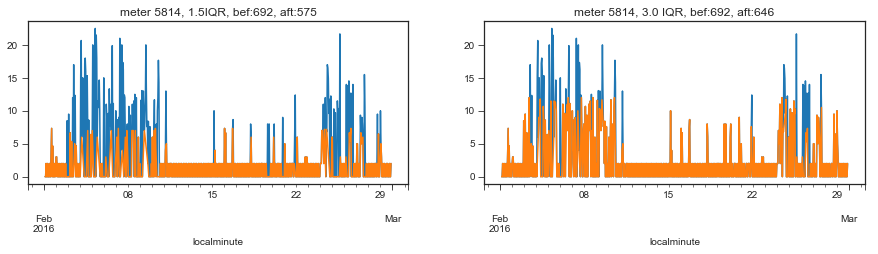

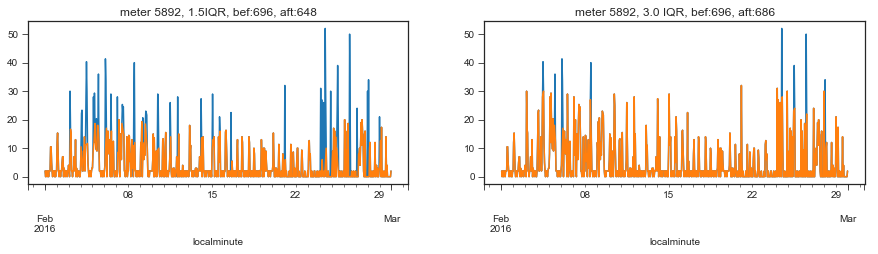

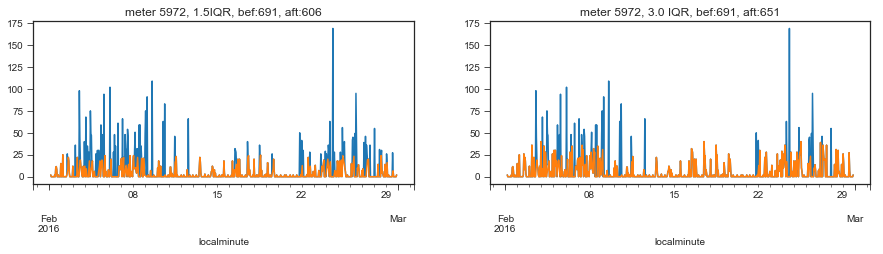

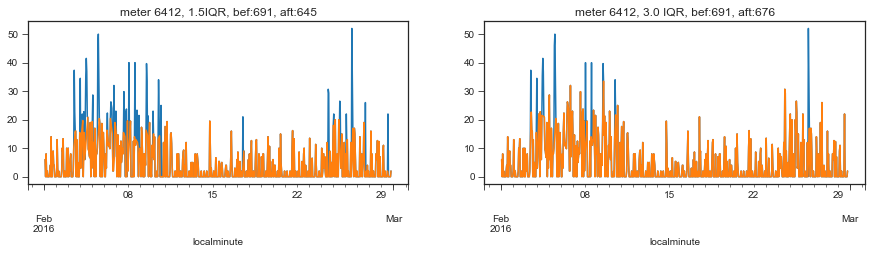

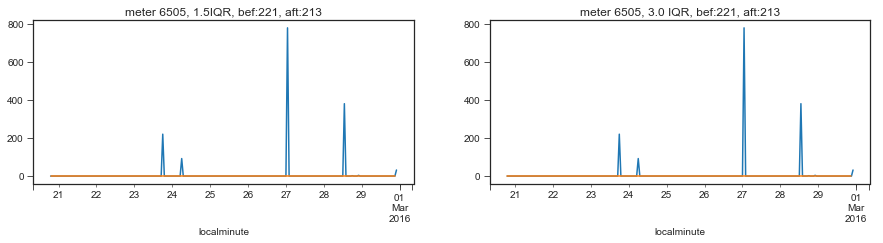

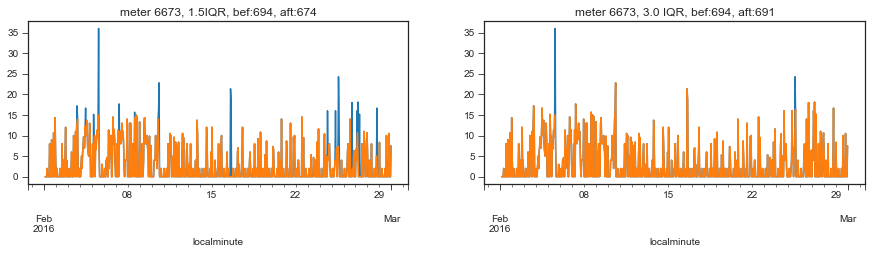

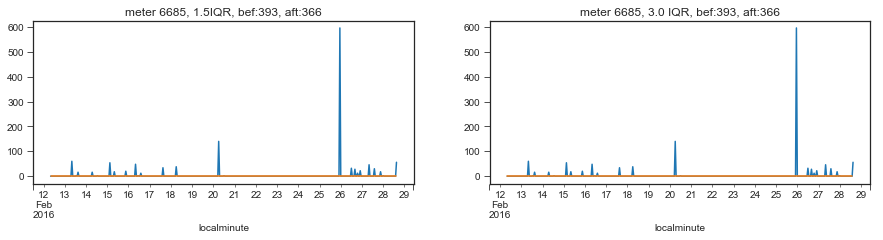

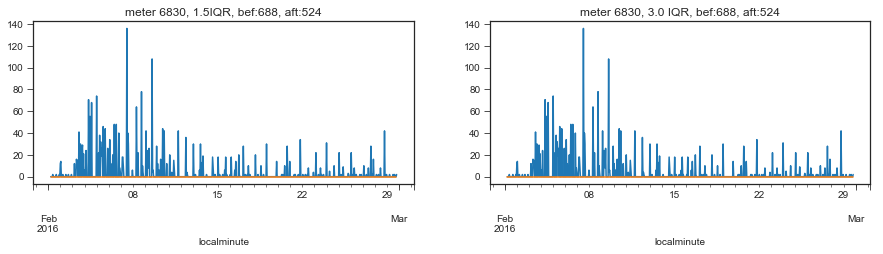

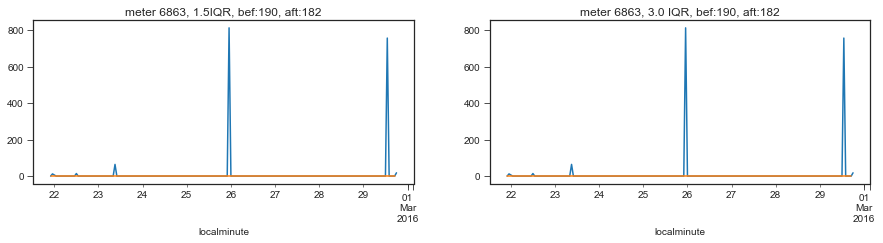

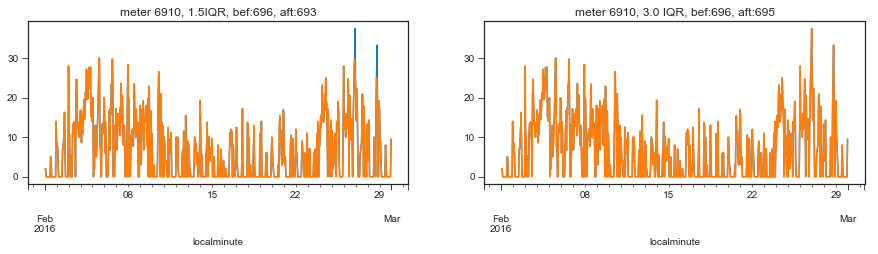

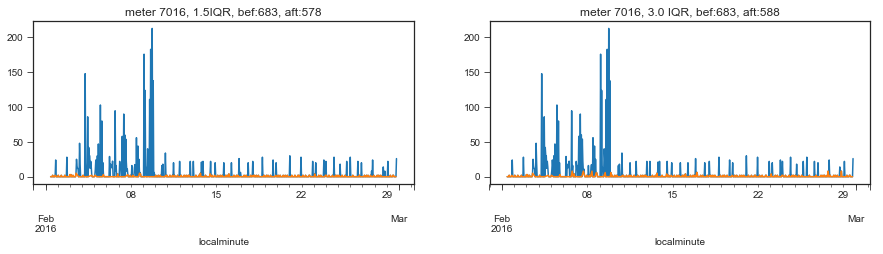

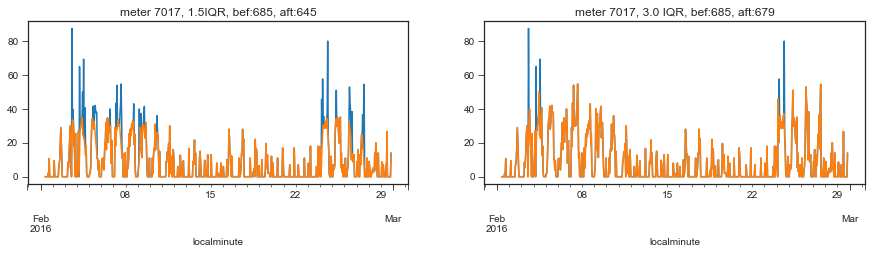

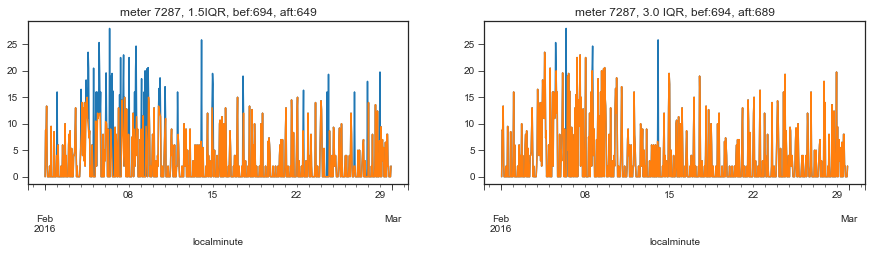

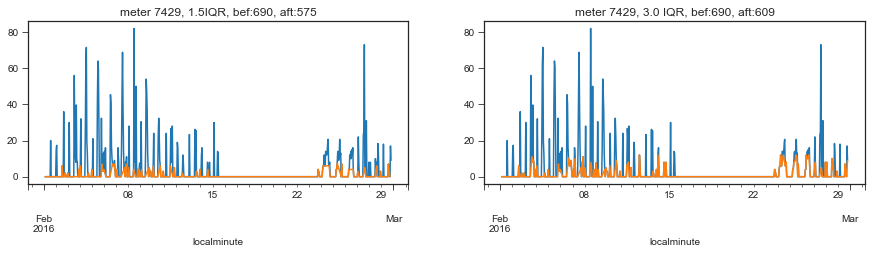

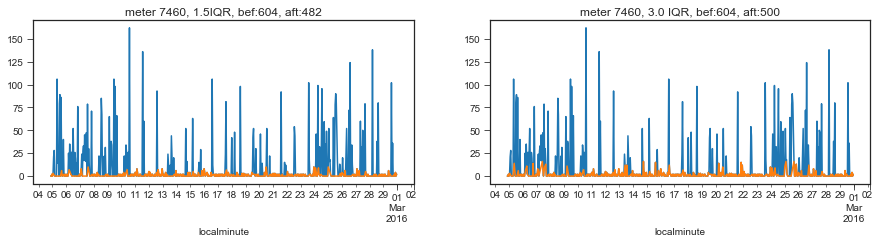

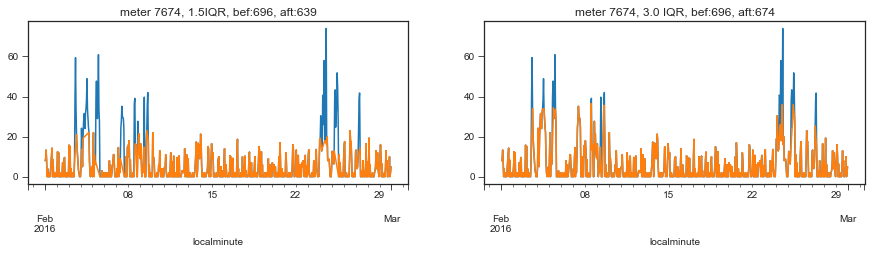

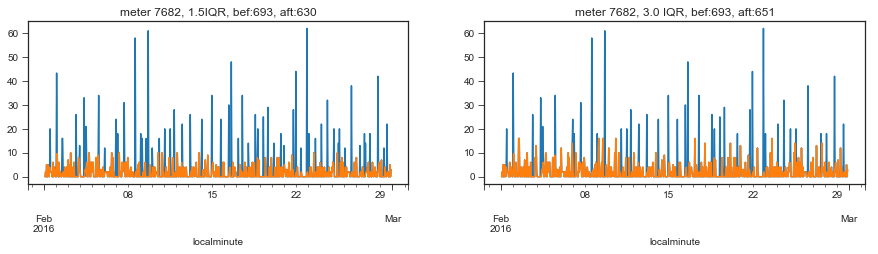

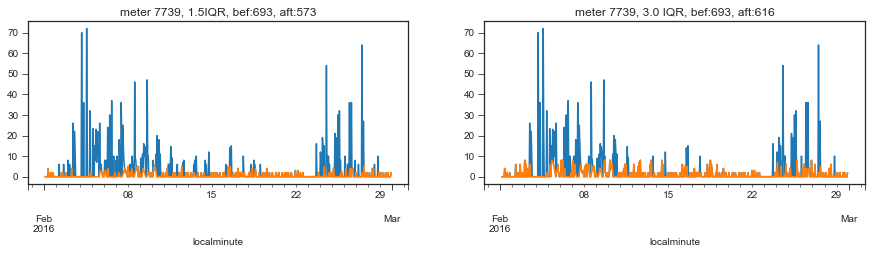

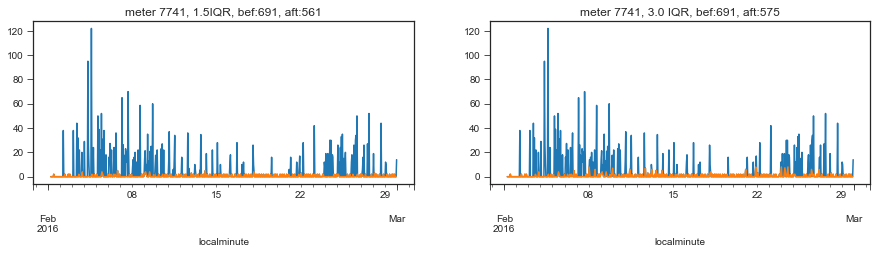

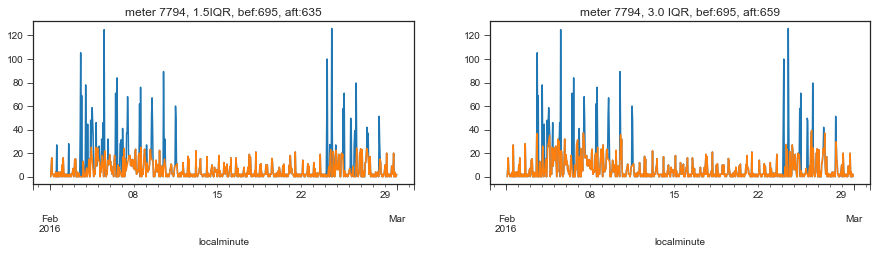

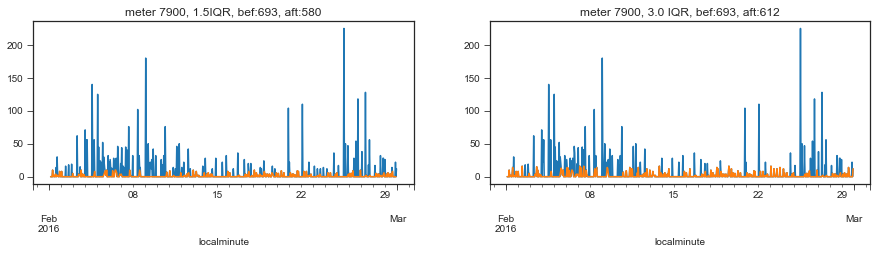

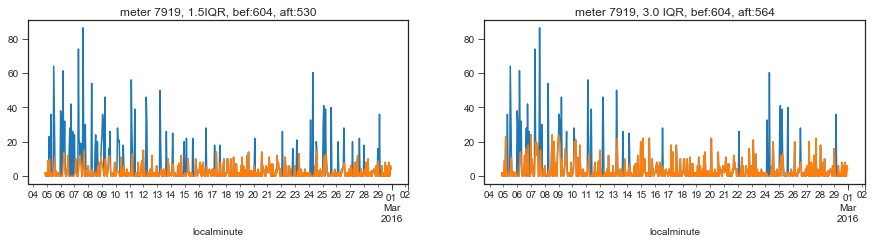

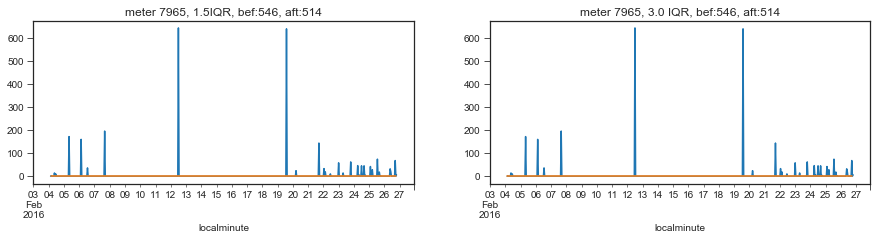

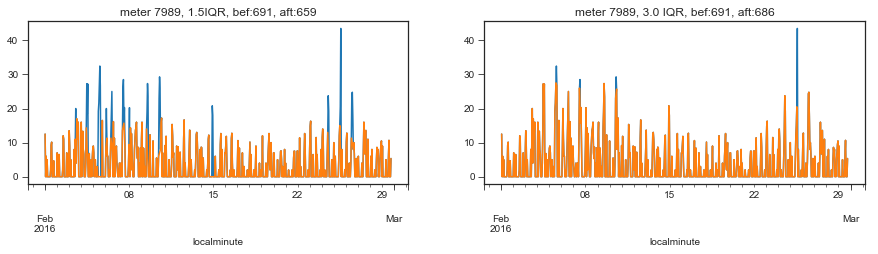

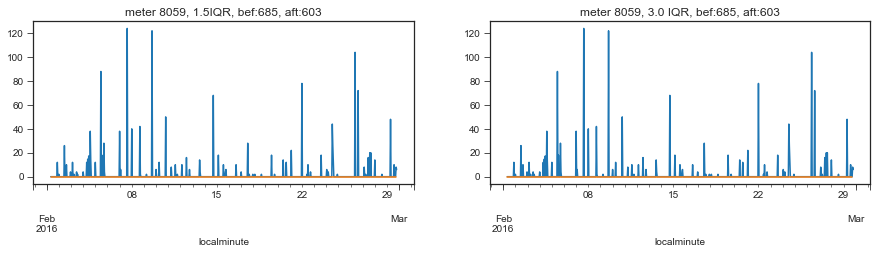

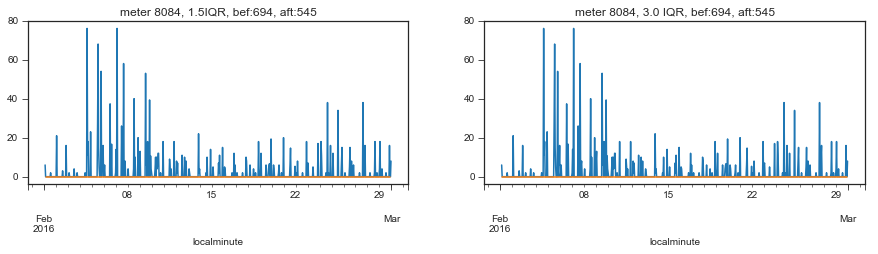

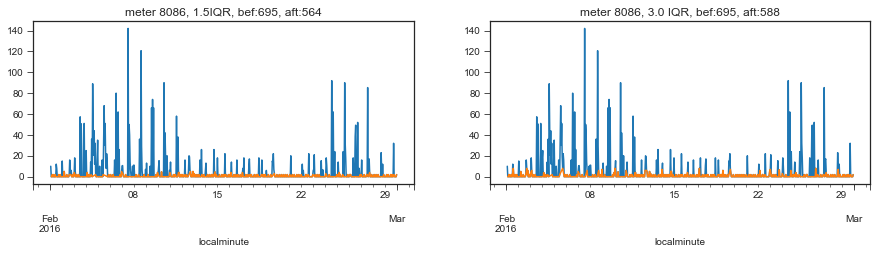

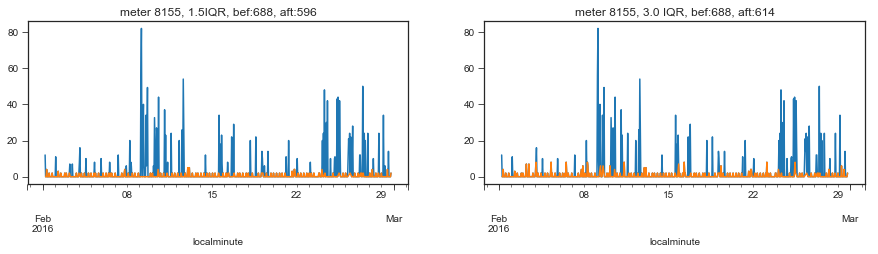

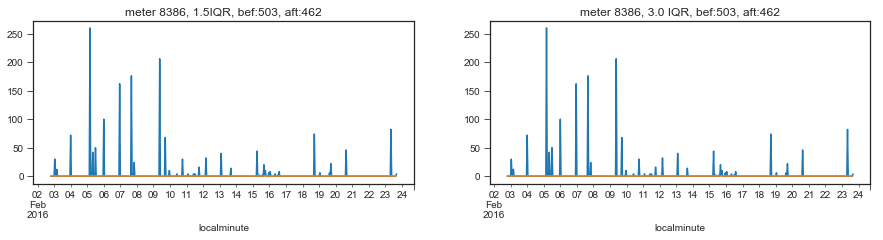

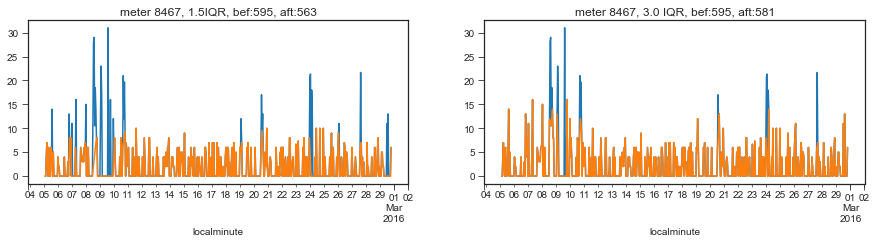

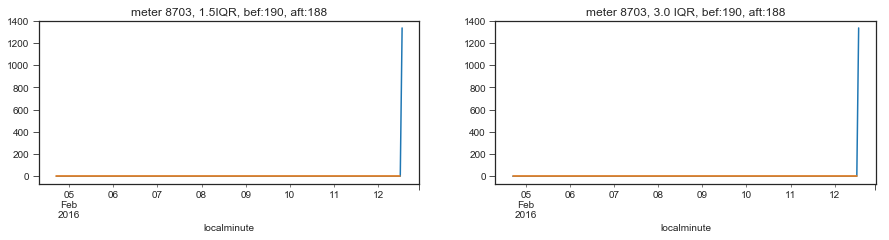

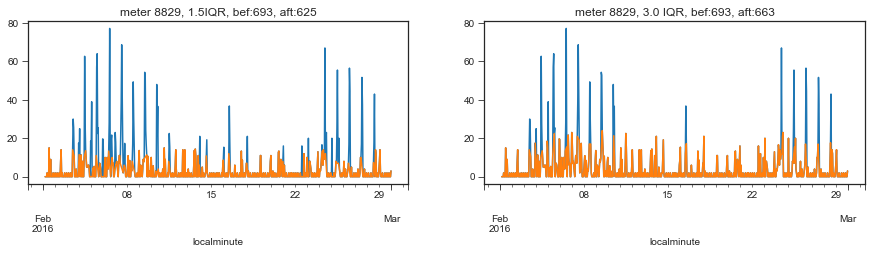

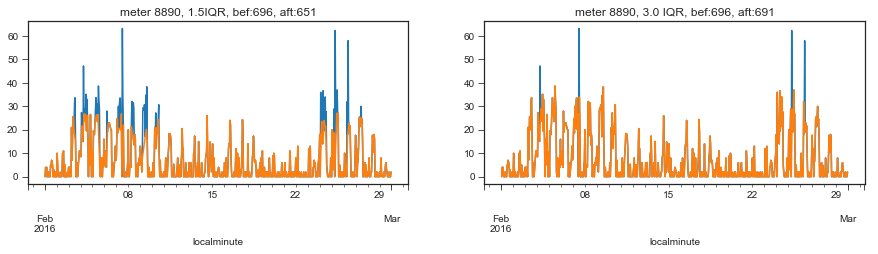

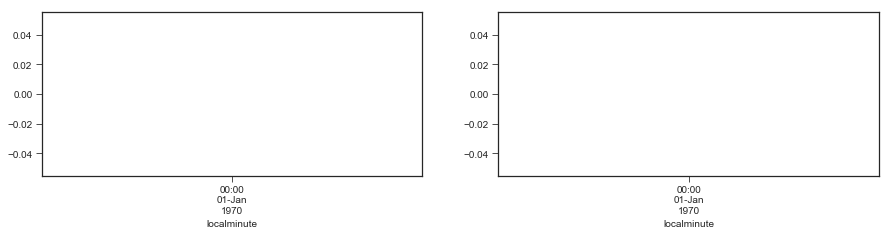

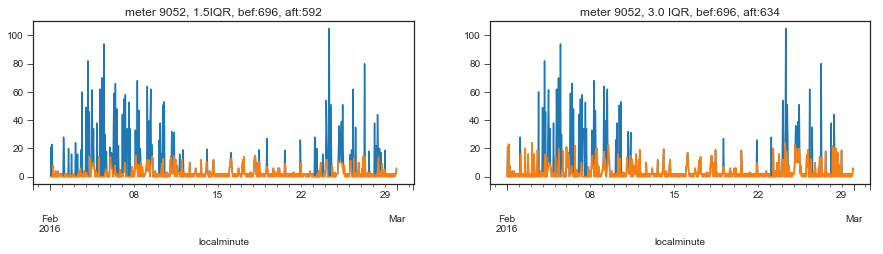

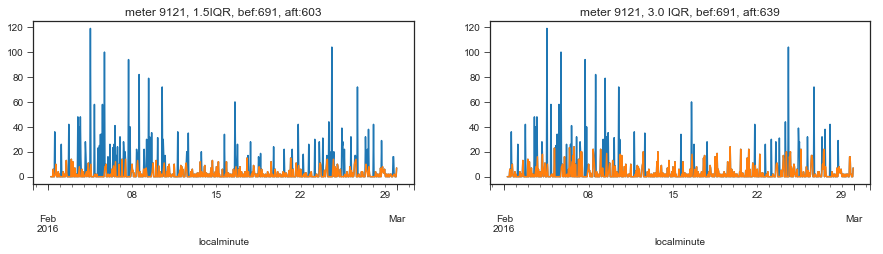

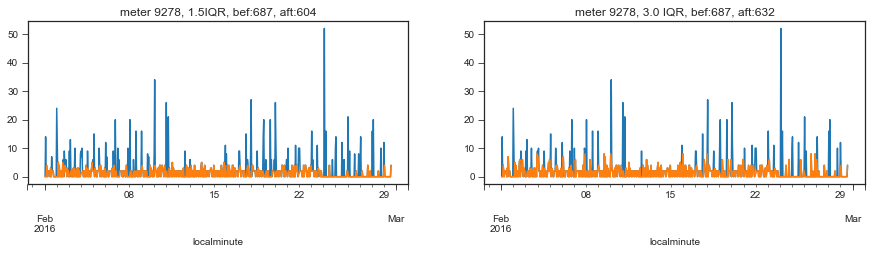

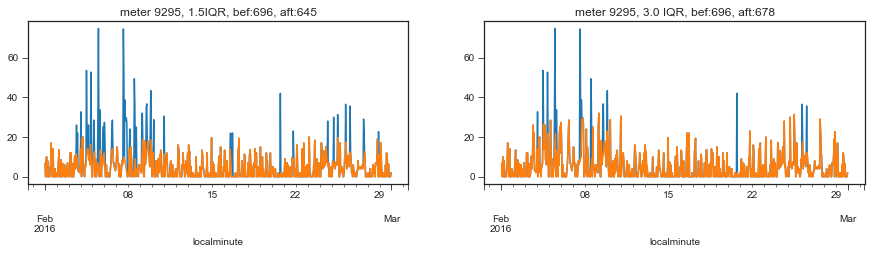

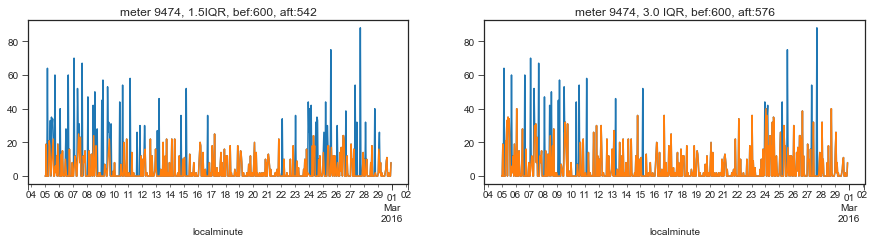

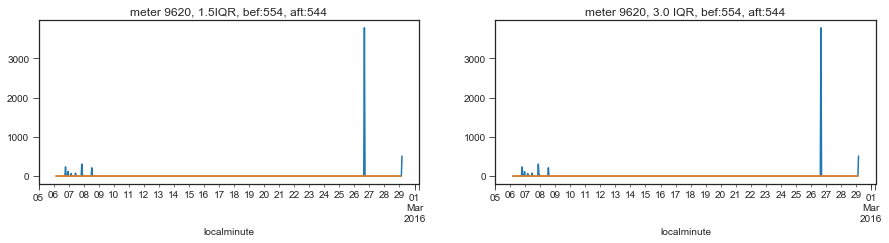

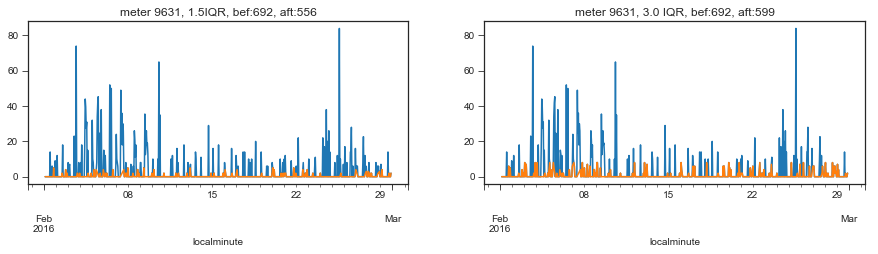

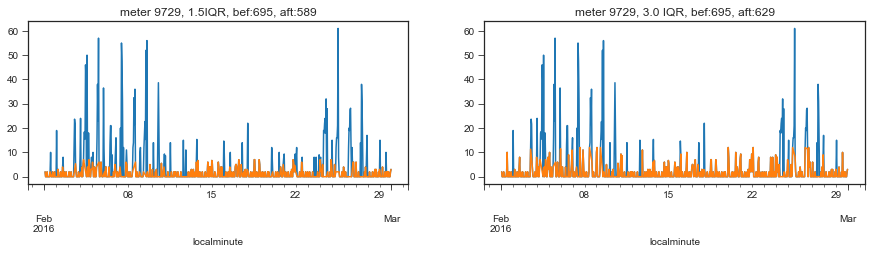

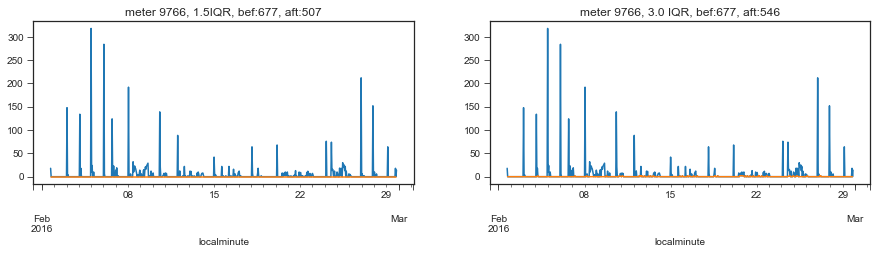

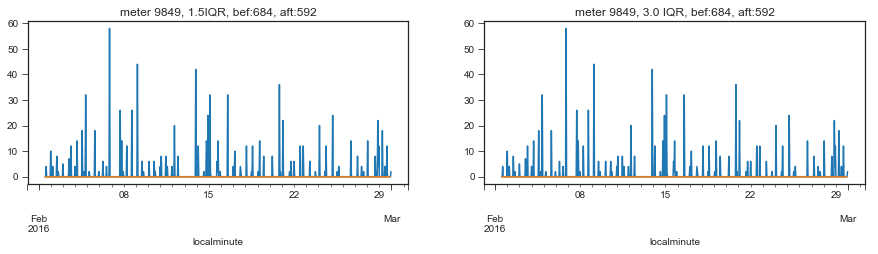

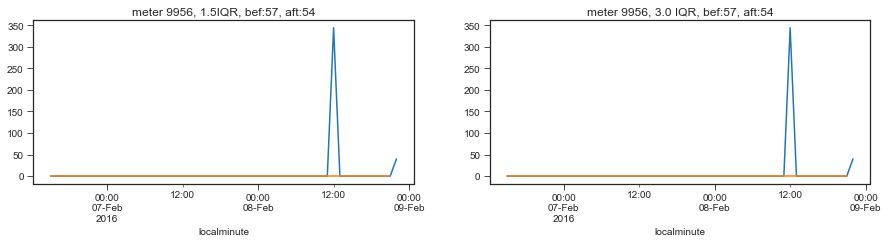

In [180]:
# malfunctioning and sparse readings
to_remove = [1185, 1556, 2335, 2449, 3134, 3544, 4447, 4514,\
             5129, 5403, 6836, 7030, 7117, 8156, 9134, 9639,\
             9982, \
             1403, 2755, 2946, 3036, 4671, 4874, 5317, 6101,\
             6578, 7566, 8244, 9160, 9600]
to_keep = [ elem for elem in keys_list if elem not in to_remove]

for key in to_keep:
    df_i = groups.get_group(key).drop(columns='dataid')
    df_i_1mth = zoom(df_i, start, end)   
    clean_resample_filter2(key, df_i_1mth)